In [205]:
import pandas as pd
import re
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from datetime import datetime
from wordcloud import WordCloud
from collections import Counter

import gensim
import gensim.corpora as corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [207]:
df = pd.read_csv('Reddit_PHE_Vehicle.csv')
df.head()

Unnamed: 0                                              title       id  \
0           0  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
1           1  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
2           2  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
3           3  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
4           4  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   

                                                 url comment_id  \
0  https://www.reddit.com/r/electricvehicles/comm...    l2skn3b   
1  https://www.reddit.com/r/electricvehicles/comm...    l2t0u4x   
2  https://www.reddit.com/r/electricvehicles/comm...    l2sncmu   
3  https://www.reddit.com/r/electricvehicles/comm...    l2slito   
4  https://www.reddit.com/r/electricvehicles/comm...    l2spe0r   

   comment_created_utc comment_link_id comment_parent_id  \
0         1.714975e+09      t3_1clbl1c        t3_1clbl1c   
1         1.714987e+09      t3_1clbl1c        t3_1clbl1c   
2         1.714976e+09      t3_1clbl1c        t3_1clbl1c   
3         1.714975e+09      t3_1clbl1c        t3_1clbl1c   
4         1.714978e+09      t3_1clbl1c        t3_1clbl1c   

                                        comment_body  
0  Or just get the car that best suits your need....  
1  My experience differs from the point of this p...  
2  PHEV's let most people realize most of the ben...  
3  Counter-point: If you are scared about going e...  
4  This is nonsense. I drive an EV but we have tw...

In [208]:

print(len(df))
df = df.drop_duplicates(subset=['comment_body'])
print(len(df))
df.head()

7810
7603


Unnamed: 0                                              title       id  \
0           0  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
1           1  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
2           2  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
3           3  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
4           4  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   

                                                 url comment_id  \
0  https://www.reddit.com/r/electricvehicles/comm...    l2skn3b   
1  https://www.reddit.com/r/electricvehicles/comm...    l2t0u4x   
2  https://www.reddit.com/r/electricvehicles/comm...    l2sncmu   
3  https://www.reddit.com/r/electricvehicles/comm...    l2slito   
4  https://www.reddit.com/r/electricvehicles/comm...    l2spe0r   

   comment_created_utc comment_link_id comment_parent_id  \
0         1.714975e+09      t3_1clbl1c        t3_1clbl1c   
1         1.714987e+09      t3_1clbl1c        t3_1clbl1c   
2         1.714976e+09      t3_1clbl1c        t3_1clbl1c   
3         1.714975e+09      t3_1clbl1c        t3_1clbl1c   
4         1.714978e+09      t3_1clbl1c        t3_1clbl1c   

                                        comment_body  
0  Or just get the car that best suits your need....  
1  My experience differs from the point of this p...  
2  PHEV's let most people realize most of the ben...  
3  Counter-point: If you are scared about going e...  
4  This is nonsense. I drive an EV but we have tw...

In [209]:
df['comment_created_utc'][0]

1714974529.0

In [211]:
print(datetime.fromtimestamp(df['comment_created_utc'][0]).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.fromtimestamp(df['comment_created_utc'][0]))

2024-05-06 06:48:49
2024-05-06 06:48:49


In [212]:
df['comment_created_utc'] = df['comment_created_utc'].apply(lambda x: datetime.fromtimestamp(x))
df['comment_created_utc'] = pd.to_datetime(df['comment_created_utc'])
df

Unnamed: 0                                              title       id  \
0              0  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
1              1  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
2              2  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
3              3  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
4              4  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
...          ...                                                ...      ...   
7805        7805        PHEV owners: Any regrets not going full EV?   s5emzx   
7806        7806        PHEV owners: Any regrets not going full EV?   s5emzx   
7807        7807        PHEV owners: Any regrets not going full EV?   s5emzx   
7808        7808        PHEV owners: Any regrets not going full EV?   s5emzx   
7809        7809        PHEV owners: Any regrets not going full EV?   s5emzx   

                                                    url comment_id  \
0     https://www.reddit.com/r/electricvehicles/comm...    l2skn3b   
1     https://www.reddit.com/r/electricvehicles/comm...    l2t0u4x   
2     https://www.reddit.com/r/electricvehicles/comm...    l2sncmu   
3     https://www.reddit.com/r/electricvehicles/comm...    l2slito   
4     https://www.reddit.com/r/electricvehicles/comm...    l2spe0r   
...                                                 ...        ...   
7805  https://www.reddit.com/r/electricvehicles/comm...    ht7hk3b   
7806  https://www.reddit.com/r/electricvehicles/comm...    ht7ivyl   
7807  https://www.reddit.com/r/electricvehicles/comm...    ht2dls2   
7808  https://www.reddit.com/r/electricvehicles/comm...    ht2ew5r   
7809  https://www.reddit.com/r/electricvehicles/comm...    ht2ke8k   

     comment_created_utc comment_link_id comment_parent_id  \
0    2024-05-06 06:48:49      t3_1clbl1c        t3_1clbl1c   
1    2024-05-06 10:09:36      t3_1clbl1c        t3_1clbl1c   
2    2024-05-06 07:19:43      t3_1clbl1c        t3_1clbl1c   
3    2024-05-06 06:58:40      t3_1clbl1c        t3_1clbl1c   
4    2024-05-06 07:44:15      t3_1clbl1c        t3_1clbl1c   
...                  ...             ...               ...   
7805 2022-01-18 18:20:57       t3_s5emzx        t1_ht7dtww   
7806 2022-01-18 18:29:08       t3_s5emzx        t1_ht7dfn1   
7807 2022-01-17 18:06:09       t3_s5emzx        t1_ht1jb02   
7808 2022-01-17 18:14:14       t3_s5emzx        t1_ht2dls2   
7809 2022-01-17 18:48:46       t3_s5emzx        t1_ht2ew5r   

                                           comment_body  
0     Or just get the car that best suits your need....  
1     My experience differs from the point of this p...  
2     PHEV's let most people realize most of the ben...  
3     Counter-point: If you are scared about going e...  
4     This is nonsense. I drive an EV but we have tw...  
...                                                 ...  
7805  I’m sorry for you. I have worked with some of ...  
7806  This is an AWD, it’s just to pay more. The mil...  
7807  From that link, a page above:\n\n> NOTE: Under...  
7808  It continues: \n\n> twelve months or 350 hours...  
7809  If the warranty is expired then sure, no reaso...  

[7603 rows x 9 columns]

In [213]:
def Type_Comment(row):
    if row["comment_link_id"] == row["comment_parent_id"]:
        return "Question"
    else:
        return "Reply"

df["Type"] = df.apply(Type_Comment, axis=1)  
df

Unnamed: 0                                              title       id  \
0              0  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
1              1  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
2              2  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
3              3  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
4              4  Don't fall for the PHEV hype – go battery EV o...  1clbl1c   
...          ...                                                ...      ...   
7805        7805        PHEV owners: Any regrets not going full EV?   s5emzx   
7806        7806        PHEV owners: Any regrets not going full EV?   s5emzx   
7807        7807        PHEV owners: Any regrets not going full EV?   s5emzx   
7808        7808        PHEV owners: Any regrets not going full EV?   s5emzx   
7809        7809        PHEV owners: Any regrets not going full EV?   s5emzx   

                                                    url comment_id  \
0     https://www.reddit.com/r/electricvehicles/comm...    l2skn3b   
1     https://www.reddit.com/r/electricvehicles/comm...    l2t0u4x   
2     https://www.reddit.com/r/electricvehicles/comm...    l2sncmu   
3     https://www.reddit.com/r/electricvehicles/comm...    l2slito   
4     https://www.reddit.com/r/electricvehicles/comm...    l2spe0r   
...                                                 ...        ...   
7805  https://www.reddit.com/r/electricvehicles/comm...    ht7hk3b   
7806  https://www.reddit.com/r/electricvehicles/comm...    ht7ivyl   
7807  https://www.reddit.com/r/electricvehicles/comm...    ht2dls2   
7808  https://www.reddit.com/r/electricvehicles/comm...    ht2ew5r   
7809  https://www.reddit.com/r/electricvehicles/comm...    ht2ke8k   

     comment_created_utc comment_link_id comment_parent_id  \
0    2024-05-06 06:48:49      t3_1clbl1c        t3_1clbl1c   
1    2024-05-06 10:09:36      t3_1clbl1c        t3_1clbl1c   
2    2024-05-06 07:19:43      t3_1clbl1c        t3_1clbl1c   
3    2024-05-06 06:58:40      t3_1clbl1c        t3_1clbl1c   
4    2024-05-06 07:44:15      t3_1clbl1c        t3_1clbl1c   
...                  ...             ...               ...   
7805 2022-01-18 18:20:57       t3_s5emzx        t1_ht7dtww   
7806 2022-01-18 18:29:08       t3_s5emzx        t1_ht7dfn1   
7807 2022-01-17 18:06:09       t3_s5emzx        t1_ht1jb02   
7808 2022-01-17 18:14:14       t3_s5emzx        t1_ht2dls2   
7809 2022-01-17 18:48:46       t3_s5emzx        t1_ht2ew5r   

                                           comment_body      Type  
0     Or just get the car that best suits your need....  Question  
1     My experience differs from the point of this p...  Question  
2     PHEV's let most people realize most of the ben...  Question  
3     Counter-point: If you are scared about going e...  Question  
4     This is nonsense. I drive an EV but we have tw...  Question  
...                                                 ...       ...  
7805  I’m sorry for you. I have worked with some of ...     Reply  
7806  This is an AWD, it’s just to pay more. The mil...     Reply  
7807  From that link, a page above:\n\n> NOTE: Under...     Reply  
7808  It continues: \n\n> twelve months or 350 hours...     Reply  
7809  If the warranty is expired then sure, no reaso...     Reply  

[7603 rows x 10 columns]

In [214]:
df.columns

Index(['Unnamed: 0', 'title', 'id', 'url', 'comment_id', 'comment_created_utc',
       'comment_link_id', 'comment_parent_id', 'comment_body', 'Type'],
      dtype='object')

In [215]:
x = df.groupby(['title','Type'],group_keys=True).apply(pd.DataFrame)
x

Unnamed: 0  \
title                                              Type                        
2023 Kia Niro Plug-in hybrid pricing starts at ... Question 6231        6231   
                                                            6232        6232   
                                                            6233        6233   
                                                            6234        6234   
                                                            6235        6235   
...                                                                      ...   
Will BEVs leapfrog the need for PHEVs or do you... Reply    7174        7174   
                                                            7175        7175   
                                                            7176        7176   
                                                            7177        7177   
                                                            7178        7178   

                                                                                                              title  \
title                                              Type                                                               
2023 Kia Niro Plug-in hybrid pricing starts at ... Question 6231  2023 Kia Niro Plug-in hybrid pricing starts at...   
                                                            6232  2023 Kia Niro Plug-in hybrid pricing starts at...   
                                                            6233  2023 Kia Niro Plug-in hybrid pricing starts at...   
                                                            6234  2023 Kia Niro Plug-in hybrid pricing starts at...   
                                                            6235  2023 Kia Niro Plug-in hybrid pricing starts at...   
...                                                                                                             ...   
Will BEVs leapfrog the need for PHEVs or do you... Reply    7174  Will BEVs leapfrog the need for PHEVs or do yo...   
                                                            7175  Will BEVs leapfrog the need for PHEVs or do yo...   
                                                            7176  Will BEVs leapfrog the need for PHEVs or do yo...   
                                                            7177  Will BEVs leapfrog the need for PHEVs or do yo...   
                                                            7178  Will BEVs leapfrog the need for PHEVs or do yo...   

                                                                       id  \
title                                              Type                     
2023 Kia Niro Plug-in hybrid pricing starts at ... Question 6231   y0g839   
                                                            6232   y0g839   
                                                            6233   y0g839   
                                                            6234   y0g839   
                                                            6235   y0g839   
...                                                                   ...   
Will BEVs leapfrog the need for PHEVs or do you... Reply    7174  198pf76   
                                                            7175  198pf76   
                                                            7176  198pf76   
                                                            7177  198pf76   
                                                            7178  198pf76   

                                                                                                                url  \
title                                              Type                                                               
2023 Kia Niro Plug-in hybrid pricing starts at ... Question 6231  https://www.thetorquereport.com/2023-kia-niro-...   
                                                            6232  https://www.thetorquereport.com/2023-kia-niro-...   

In [216]:
for name in x.index:
    print (name)
    print (x.loc[name])
    break

('2023 Kia Niro Plug-in hybrid pricing starts at $35,035', 'Question', 6231)
Unnamed: 0                                                          6231
title                  2023 Kia Niro Plug-in hybrid pricing starts at...
id                                                                y0g839
url                    https://www.thetorquereport.com/2023-kia-niro-...
comment_id                                                       irrkx6o
comment_created_utc                                  2022-10-10 15:40:43
comment_link_id                                                t3_y0g839
comment_parent_id                                              t3_y0g839
comment_body           11kwh battery. I guess it’s an ok starter vehi...
Type                                                            Question
Name: (2023 Kia Niro Plug-in hybrid pricing starts at $35,035, Question, 6231), dtype: object


In [217]:
def no_retweets(text):
    keep = []
    for word in text.split():
        if not word.startswith("@"):
            keep.append(word)
    return ' '.join(keep)

def no_http_links(text):
    keep = []
    for word in text.split():
        if not word.startswith("http"):
            keep.append(word)
    return ' '.join(keep)

In [218]:
def preprocessing_text(text):
    text = text.lower()
    text = text.strip()
    pattern = r'\!\[gif\]\(emote\|free_emotes_pack\|\w+\)'
    text = re.sub(pattern, ' ', text)
    
    pattern = r"\!+"
    text = re.sub(pattern, " ", text)
    pattern = r"\?+"
    text =text.replace('(', ' ')
    text =text.replace('[', ' ')
    
    text = no_retweets(text)
    text = no_http_links(text)
    text = re.sub("[^a-zA-Z]"," ",text)
    return text

preprocessing_text("Up and Down https://www.google.com 12 @dawdawawd  ![gif](emote|free_emotes_pack|joy) jdwa!!!")

'up and down    jdwa'

In [219]:
def language_code(text):
    try:
        return detect(text)
    except:
        return "Unknown"
language_code(preprocessing_text("Up and Down https://www.google.com @dawdawawd jdwa!!!"))


'en'

In [220]:
def stop_words(text):
    keep = []
    for word in text.split():
        if word not in stopwords.words("english"):
            if len(word) >1:
                if word not in ['electric','ev','vehicle', 'emote', 'gif', 'phev','phevs']:
                    keep.append(word)
        
    return ' '.join(keep)
stop_words(preprocessing_text("Up gif and k ev Down https://www.google.com @dawdawawd   ![gif](emote|free_emotes_pack|joy) jdwa!!!  "))

'jdwa'

In [221]:
stop_words(word_stemmer(preprocessing_text("It works in such an extremely narrow set of rules that it's basically useless.")))

'work extremely narrow set rule basically useless'

In [222]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [223]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']

def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

def penn_to_wn(tag):
    if is_adjective(tag):
        return wn.ADJ
    elif is_noun(tag):
        return wn.NOUN
    elif is_adverb(tag):
        return wn.ADV
    elif is_verb(tag):
        return wn.VERB
    return wn.NOUN

def word_stemmer(text):
    keep = []
    tags = nltk.pos_tag(word_tokenize(text))
    for tag in tags:
        wn_tag = penn_to_wn(tag[1])
        keep.append(WordNetLemmatizer().lemmatize(tag[0],wn_tag))
    return ' '.join(keep)  

In [224]:
query = 'swedish electric car battery start northvolt getting started chinese'
print(query)
print(word_stemmer(query))

swedish electric car battery start northvolt getting started chinese
swedish electric car battery start northvolt get start chinese


# Title Analysis

In [225]:
df_title = df[['title','comment_created_utc']]
print(len(df_title))
df_title = df_title.drop_duplicates(subset=['title'])
print(len(df_title))
df_title.head()

7603
29


title comment_created_utc
0     Don't fall for the PHEV hype – go battery EV o... 2024-05-06 06:48:49
650               PHEVs have been largely disappointing 2024-04-08 15:50:54
1115  Toyota Planning Plug-In Hybrid Vehicles With O... 2023-04-07 19:40:35
1566  GM to release plug-in hybrid vehicles, backtra... 2024-01-30 17:29:03
1997  Unpopular Opinion Probably: 100% Gasoline Hybr... 2021-06-09 19:21:24

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

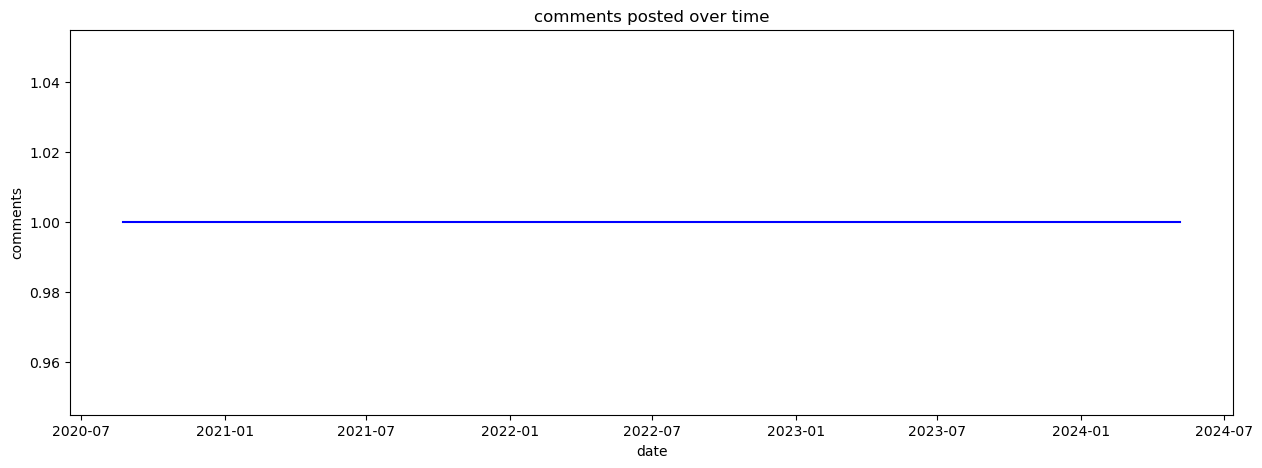

In [226]:
df_title.groupby(df_title["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="b",figsize = (15,5))

In [227]:
df_title['cleaned_title'] = df_title['title'].apply(lambda x: preprocessing_text(x))
df_title['cleaned_title'] = df_title['cleaned_title'].apply(lambda x: word_stemmer(x))
df_title['cleaned_title'] = df_title['cleaned_title'].apply(lambda x: stop_words(x))
df_title

title comment_created_utc  \
0     Don't fall for the PHEV hype – go battery EV o... 2024-05-06 06:48:49   
650               PHEVs have been largely disappointing 2024-04-08 15:50:54   
1115  Toyota Planning Plug-In Hybrid Vehicles With O... 2023-04-07 19:40:35   
1566  GM to release plug-in hybrid vehicles, backtra... 2024-01-30 17:29:03   
1997  Unpopular Opinion Probably: 100% Gasoline Hybr... 2021-06-09 19:21:24   
2428  The main reasons people do not buy electric cars. 2021-12-28 20:32:07   
2812  America’s Plug-In Hybrids Aren’t Good Enough -... 2024-02-14 04:23:08   
3203  PHEVs are Mis-marketed and Misunderstand and T... 2023-02-13 04:43:08   
3538  Previously I posted about needing a PHEV for r... 2022-06-04 02:15:03   
3840  Plug-in hybrids are flooding showrooms. But fe... 2020-08-24 18:56:07   
4095  Americans can help fix the IRS' "Qualified Plu... 2023-01-05 02:48:11   
4360  Oregon Follows California, Bans Combustion New... 2023-01-11 14:25:35   
4611  Study: EV, Plug-in Hybrid Battery Replacements... 2024-04-30 12:05:07   
4659  Drivers of Jeep, Kia plug-in hybrids take char... 2023-10-23 19:15:00   
4870                                  BMW iX is so Good 2024-04-27 02:00:21   
5067  Mercedes To Stop Developing Plug-In Hybrid Tec... 2021-09-12 15:45:52   
5266  Plug-in hybrids emit many times the claimed CO... 2023-02-19 16:02:52   
5452  2023 Toyota Prius Prime First Drive Review: Ha... 2023-04-06 00:39:07   
5838  2023 Toyota Prius Prime PHEV Has A Lot More Po... 2022-11-18 04:13:43   
5947  The Toyota Prius Is the 2024 MotorTrend Car of... 2023-11-17 03:42:23   
6231  2023 Kia Niro Plug-in hybrid pricing starts at... 2022-10-10 15:40:43   
6370  Girlfriend got a 2022 Kia Niro PHEV! So excite... 2021-10-28 12:40:58   
6424                                     PHEV worth it? 2023-12-13 05:03:29   
6561                                    PHEVs to avoid? 2023-05-28 19:10:03   
6686                           Opinion: PHEVs are great 2023-02-10 05:39:07   
7012  Will BEVs leapfrog the need for PHEVs or do yo... 2024-01-17 13:33:31   
7179  My “PHEVs still do better for some road trips”... 2024-05-04 23:19:37   
7421                    Why Do Most PHEVs Have Bad MPG? 2023-10-01 06:08:43   
7597        PHEV owners: Any regrets not going full EV? 2022-01-16 16:23:17   

                                          cleaned_title  
0       fall hype go battery go home ice sheep clothing  
650                               largely disappointing  
1115                 toyota plan plug hybrid mile range  
1566      gm release plug hybrid backtrack product plan  
1997  unpopular opinion probably gasoline hybrid pos...  
2428                         main reason people buy car  
2812           america plug hybrid good enough autopian  
3203                   mis marketed misunderstand shame  
3538  previously post need road trip seduce appearan...  
3840           plug hybrid flood showroom american know  
4095  american help fix irs qualify plug drive motor...  
4360  oregon follow california ban combustion new ca...  
4611  study plug hybrid battery replacement rare kel...  
4659  driver jeep kia plug hybrid take charge seriou...  
4870                                        bmw ix good  
5067          mercedes stop develop plug hybrid tech go  
5266  plug hybrid emit many time claimed co test sug...  
5452     toyota prius prime first drive review cake eat  
5838                 toyota prius prime lot power range  
5947                   toyota prius motortrend car year  
6231                 kia niro plug hybrid pricing start  
6370  girlfriend get kia niro excited something leas...  
6424                                              worth  
6561                                              avoid  
6686                                      opinion great  
7012           bevs leapfrog need see place near future  
7179                          still good road trip math  
7421                                            bad mpg

In [228]:
title_combined =''
for each in df_title['cleaned_title']:
    title_combined = title_combined + " " + each
print(title_combined)

 fall hype go battery go home ice sheep clothing largely disappointing toyota plan plug hybrid mile range gm release plug hybrid backtrack product plan unpopular opinion probably gasoline hybrid post allow main reason people buy car america plug hybrid good enough autopian mis marketed misunderstand shame previously post need road trip seduce appearance ioniq take multiple road trip se rwd thing think everyone consider switch bev road trip plug hybrid flood showroom american know american help fix irs qualify plug drive motor credit feb th oregon follow california ban combustion new car sale plug hybrid gas diesel engine exception rule study plug hybrid battery replacement rare kelley blue book driver jeep kia plug hybrid take charge seriously matter bmw ix good mercedes stop develop plug hybrid tech go plug hybrid emit many time claimed co test suggest toyota prius prime first drive review cake eat toyota prius prime lot power range toyota prius motortrend car year kia niro plug hybri

In [229]:
len(title_combined)

1195

In [230]:
# !pip install spacy 
# ! python -m spacy download en_core_web_sm

In [231]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [232]:
# for each in df_title['cleaned_title']:
#     print(each)
#     doc = nlp(each)
#     for ent in doc.ents:
#         print(ent.text, ent.start_char, ent.end_char, ent.label_)
#     print("-----------------")
# #     break

In [233]:
doc = nlp(title_combined)

In [234]:
df_ner = pd.DataFrame(columns=['Text','Label'])

for ent in doc.ents:
    df_ner.loc[len(df_ner)]  = [ent.text, ent.label_]
#     break
df_ner.head()

Text Label
0    toyota   ORG
1        gm   ORG
2  autopian  NORP
3  american  NORP
4  american  NORP

In [235]:
df_ner['Label'].unique()

array(['ORG', 'NORP', 'GPE', 'PRODUCT', 'ORDINAL'], dtype=object)

In [236]:
xorg = df_ner[df_ner['Label'] =='ORG']
xorg['Text'].value_counts()[:10]

toyota    4
kia       3
gm        1
irs       1
Name: Text, dtype: int64

In [237]:

for each in df_ner['Label'].unique():
    print(each)
    xorg = df_ner[df_ner['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

ORG
toyota    4
kia       3
gm        1
irs       1
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
NORP
american    2
autopian    1
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
GPE
oregon        1
california    1
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
PRODUCT
bmw    1
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORDINAL
first    1
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------


In [238]:
df_ner.groupby('Label').count()

Text
Label        
GPE         2
NORP        3
ORDINAL     1
ORG         9
PRODUCT     1

In [239]:
xdf = pd.DataFrame(df_ner[df_ner['Label'] =='ORG']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
xdf

ORG  frequency
0  toyota          4
1     kia          3
2      gm          1
3     irs          1

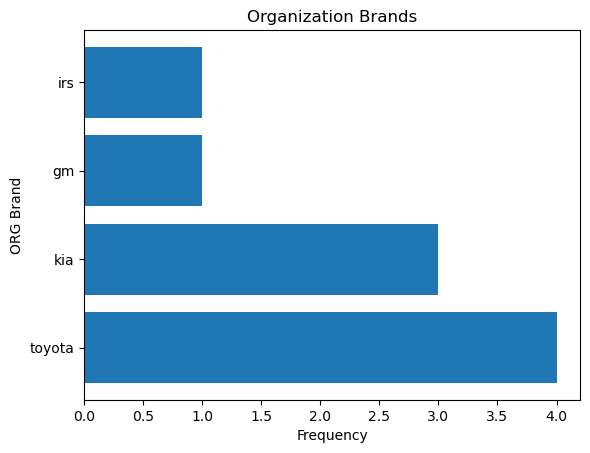

In [240]:
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("ORG Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("Organization Brands")
plt.show()

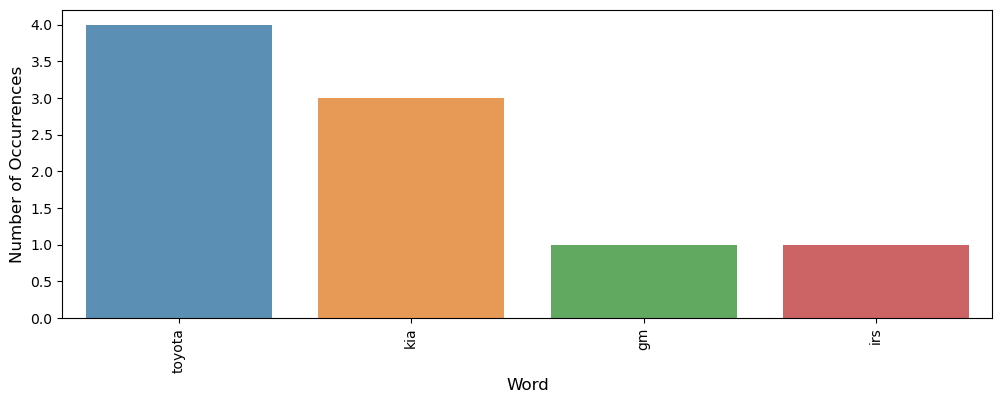

In [241]:

plt.figure(figsize=(12,4))
sns.barplot(data=xdf, x='ORG', y='frequency', alpha=0.8) #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [242]:
# !pip install pytextrank

In [243]:

import spacy
import pytextrank
 
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank")

In [244]:
doc = nlp(title_combined)
 
for sent in doc._.textrank.summary(limit_phrases=5, limit_sentences=5):
    print(sent)
    print('Summary Length:',len(sent))

 fall hype go battery go home ice sheep clothing largely disappointing toyota plan plug hybrid mile range gm release plug hybrid backtrack product plan unpopular opinion probably gasoline hybrid post allow main reason people buy car america plug hybrid good enough autopian mis marketed misunderstand shame previously post need road trip seduce appearance ioniq take multiple road trip se rwd thing think everyone consider switch bev road trip plug hybrid flood showroom american know american help fix irs qualify plug drive motor credit feb th oregon follow california ban combustion new car sale plug hybrid gas diesel engine exception rule study plug hybrid battery replacement rare kelley blue book driver jeep kia plug hybrid take charge seriously matter bmw ix
Summary Length: 121
good mercedes stop develop plug hybrid tech go plug hybrid emit many time claimed co test suggest toyota prius prime first drive review cake eat toyota prius prime lot power range toyota prius motortrend car year

In [245]:
df_ner.groupby('Label').sum()

Text
Label                                          
GPE                            oregoncalifornia
NORP                   autopianamericanamerican
ORDINAL                                   first
ORG      toyotagmirskiatoyotatoyotatoyotakiakia
PRODUCT                                     bmw

In [246]:
# nltk.download('all')

In [247]:
# doc = nlp(title_combined)
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [248]:

word_counter = Counter()
for row in df_title.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf = pd.DataFrame(word_counter.most_common())
df_tf.columns = ["term", "frequency"]
df_tf

term  frequency
0      plug         11
1    hybrid         11
2        go          4
3    toyota          4
4      road          4
..      ...        ...
136     bad          1
137     mpg          1
138   owner          1
139  regret          1
140    full          1

[141 rows x 2 columns]

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

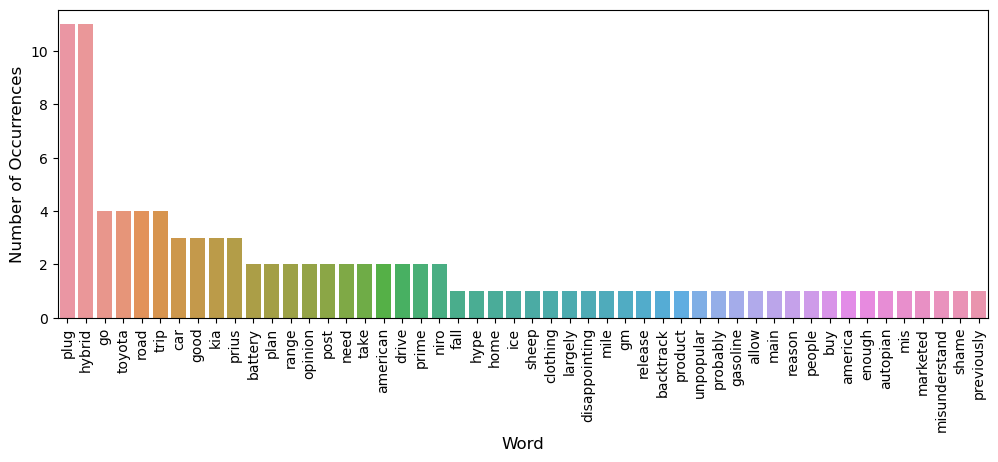

In [250]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf[:50], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [251]:

cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image.save("wordcloud.png")

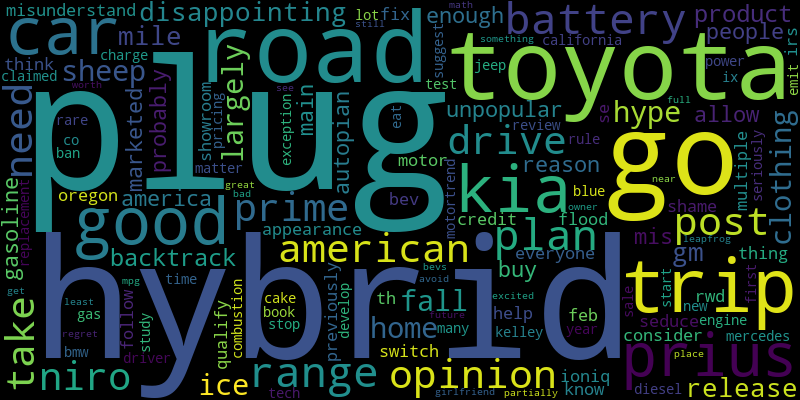

In [252]:
image

In [253]:
documents = [comment.split() for comment in df_title['cleaned_title']] #tokenizing_the_words
documents

[['fall', 'hype', 'go', 'battery', 'go', 'home', 'ice', 'sheep', 'clothing'],
 ['largely', 'disappointing'],
 ['toyota', 'plan', 'plug', 'hybrid', 'mile', 'range'],
 ['gm', 'release', 'plug', 'hybrid', 'backtrack', 'product', 'plan'],
 ['unpopular', 'opinion', 'probably', 'gasoline', 'hybrid', 'post', 'allow'],
 ['main', 'reason', 'people', 'buy', 'car'],
 ['america', 'plug', 'hybrid', 'good', 'enough', 'autopian'],
 ['mis', 'marketed', 'misunderstand', 'shame'],
 ['previously',
  'post',
  'need',
  'road',
  'trip',
  'seduce',
  'appearance',
  'ioniq',
  'take',
  'multiple',
  'road',
  'trip',
  'se',
  'rwd',
  'thing',
  'think',
  'everyone',
  'consider',
  'switch',
  'bev',
  'road',
  'trip'],
 ['plug', 'hybrid', 'flood', 'showroom', 'american', 'know'],
 ['american',
  'help',
  'fix',
  'irs',
  'qualify',
  'plug',
  'drive',
  'motor',
  'credit',
  'feb',
  'th'],
 ['oregon',
  'follow',
  'california',
  'ban',
  'combustion',
  'new',
  'car',
  'sale',
  'plug',
  

In [254]:
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.055*"hybrid" + 0.055*"toyota" + 0.055*"range" + 0.029*"plug" + '
  '0.029*"allow" + 0.029*"unpopular" + 0.029*"probably" + 0.029*"plan" + '
  '0.029*"prius" + 0.029*"lot"'),
 (1,
  '0.070*"go" + 0.037*"plug" + 0.037*"clothing" + 0.037*"battery" + '
  '0.037*"fall" + 0.037*"hype" + 0.037*"product" + 0.037*"hybrid" + '
  '0.037*"plan" + 0.037*"ice"'),
 (2,
  '0.048*"cake" + 0.048*"review" + 0.048*"drive" + 0.048*"prius" + '
  '0.048*"toyota" + 0.048*"prime" + 0.048*"eat" + 0.048*"first" + '
  '0.048*"worth" + 0.004*"hybrid"'),
 (3,
  '0.072*"plug" + 0.049*"american" + 0.049*"hybrid" + 0.026*"drive" + '
  '0.026*"qualify" + 0.026*"irs" + 0.026*"fix" + 0.026*"th" + 0.026*"toyota" + '
  '0.026*"feb"'),
 (4,
  '0.044*"plug" + 0.044*"hybrid" + 0.023*"book" + 0.023*"battery" + '
  '0.023*"kelley" + 0.023*"place" + 0.023*"replacement" + 0.023*"need" + '
  '0.023*"future" + 0.023*"study"'),
 (5,
  '0.058*"road" + 0.058*"trip" + 0.021*"plug" + 0.021*"ioniq" + 0.021*"take" + '
  '0.021*"

In [255]:
sia = SentimentIntensityAnalyzer()
def score_vader(row):
    text = row["cleaned_title"]
    return sia.polarity_scores(text)["compound"]

df_title["vader_sentiment"] = df_title.apply(score_vader, axis=1)

In [256]:
df_title

title comment_created_utc  \
0     Don't fall for the PHEV hype – go battery EV o... 2024-05-06 06:48:49   
650               PHEVs have been largely disappointing 2024-04-08 15:50:54   
1115  Toyota Planning Plug-In Hybrid Vehicles With O... 2023-04-07 19:40:35   
1566  GM to release plug-in hybrid vehicles, backtra... 2024-01-30 17:29:03   
1997  Unpopular Opinion Probably: 100% Gasoline Hybr... 2021-06-09 19:21:24   
2428  The main reasons people do not buy electric cars. 2021-12-28 20:32:07   
2812  America’s Plug-In Hybrids Aren’t Good Enough -... 2024-02-14 04:23:08   
3203  PHEVs are Mis-marketed and Misunderstand and T... 2023-02-13 04:43:08   
3538  Previously I posted about needing a PHEV for r... 2022-06-04 02:15:03   
3840  Plug-in hybrids are flooding showrooms. But fe... 2020-08-24 18:56:07   
4095  Americans can help fix the IRS' "Qualified Plu... 2023-01-05 02:48:11   
4360  Oregon Follows California, Bans Combustion New... 2023-01-11 14:25:35   
4611  Study: EV, Plug-in Hybrid Battery Replacements... 2024-04-30 12:05:07   
4659  Drivers of Jeep, Kia plug-in hybrids take char... 2023-10-23 19:15:00   
4870                                  BMW iX is so Good 2024-04-27 02:00:21   
5067  Mercedes To Stop Developing Plug-In Hybrid Tec... 2021-09-12 15:45:52   
5266  Plug-in hybrids emit many times the claimed CO... 2023-02-19 16:02:52   
5452  2023 Toyota Prius Prime First Drive Review: Ha... 2023-04-06 00:39:07   
5838  2023 Toyota Prius Prime PHEV Has A Lot More Po... 2022-11-18 04:13:43   
5947  The Toyota Prius Is the 2024 MotorTrend Car of... 2023-11-17 03:42:23   
6231  2023 Kia Niro Plug-in hybrid pricing starts at... 2022-10-10 15:40:43   
6370  Girlfriend got a 2022 Kia Niro PHEV! So excite... 2021-10-28 12:40:58   
6424                                     PHEV worth it? 2023-12-13 05:03:29   
6561                                    PHEVs to avoid? 2023-05-28 19:10:03   
6686                           Opinion: PHEVs are great 2023-02-10 05:39:07   
7012  Will BEVs leapfrog the need for PHEVs or do yo... 2024-01-17 13:33:31   
7179  My “PHEVs still do better for some road trips”... 2024-05-04 23:19:37   
7421                    Why Do Most PHEVs Have Bad MPG? 2023-10-01 06:08:43   
7597        PHEV owners: Any regrets not going full EV? 2022-01-16 16:23:17   

                                          cleaned_title  vader_sentiment  
0       fall hype go battery go home ice sheep clothing           0.0000  
650                               largely disappointing          -0.4939  
1115                 toyota plan plug hybrid mile range           0.0000  
1566      gm release plug hybrid backtrack product plan           0.0000  
1997  unpopular opinion probably gasoline hybrid pos...           0.2263  
2428                         main reason people buy car           0.0000  
2812           america plug hybrid good enough autopian           0.4404  
3203                   mis marketed misunderstand shame          -0.6808  
3538  previously post need road trip seduce appearan...           0.0000  
3840           plug hybrid flood showroom american know           0.0000  
4095  american help fix irs qualify plug drive motor...           0.6486  
4360  oregon follow california ban combustion new ca...          -0.5574  
4611  study plug hybrid battery replacement rare kel...           0.0000  
4659  driver jeep kia plug hybrid take charge seriou...          -0.7003  
4870                                        bmw ix good           0.4404  
5067          mercedes stop develop plug hybrid tech go          -0.2960  
5266  plug hybrid emit many time claimed co test sug...           0.0000  
5452     toyota prius prime first drive review cake eat           0.0000  
5838                 toyota prius prime lot power range           0.0000  
5947                   toyota prius motortrend car year           0.0000  
6231                 kia niro plug hybrid pricing start          -0.6369  
6370  girlfriend get kia niro

<Axes: title={'center': 'Pages for Electric Vehicle Topics'}, ylabel='Frequency'>

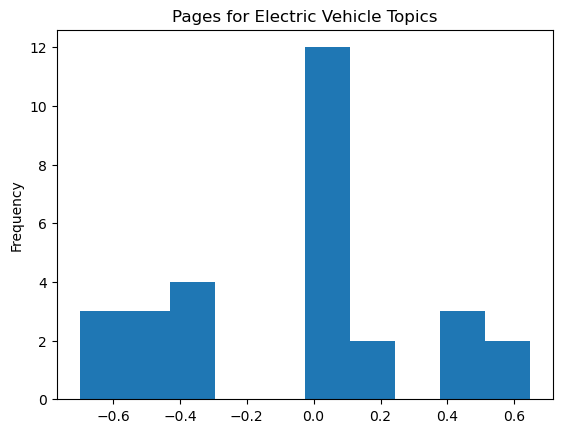

In [257]:
df_title["vader_sentiment"].plot(kind="hist",title= "Pages for Electric Vehicle Topics")

In [258]:
print("Positive Pages for Electric Vehicle Topics Count - " + str(len(df_title[df_title['vader_sentiment'] > 0])))
print("Neutral Pages for Electric Vehicle Topics Count - " + str(len(df_title[df_title['vader_sentiment'] == 0])))
print("Negative Pages for Electric Vehicle Topics Count - " + str(len(df_title[df_title['vader_sentiment'] < 0])))

Positive Pages for Electric Vehicle Topics Count - 7
Neutral Pages for Electric Vehicle Topics Count - 12
Negative Pages for Electric Vehicle Topics Count - 10


In [259]:
def get_top_n_bigram(corpus, n=None, grams = 2):
    vec = CountVectorizer(ngram_range=(grams, grams), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [260]:
 from sklearn.feature_extraction.text import CountVectorizer

In [261]:
get_top_n_bigram(df_title['cleaned_title'], 20)

[('plug hybrid', 10),
 ('road trip', 4),
 ('toyota prius', 3),
 ('prius prime', 2),
 ('kia niro', 2),
 ('fall hype', 1),
 ('hype battery', 1),
 ('battery home', 1),
 ('home ice', 1),
 ('ice sheep', 1),
 ('sheep clothing', 1),
 ('largely disappointing', 1),
 ('toyota plan', 1),
 ('plan plug', 1),
 ('hybrid mile', 1),
 ('mile range', 1),
 ('gm release', 1),
 ('release plug', 1),
 ('hybrid backtrack', 1),
 ('backtrack product', 1)]

plug hybrid 10
road trip 4
toyota prius 3
prius prime 2
kia niro 2
fall hype 1
hype battery 1
battery home 1
home ice 1
ice sheep 1
sheep clothing 1
largely disappointing 1
toyota plan 1
plan plug 1
hybrid mile 1
mile range 1
gm release 1
release plug 1
hybrid backtrack 1
backtrack product 1


<Axes: title={'center': 'Common Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

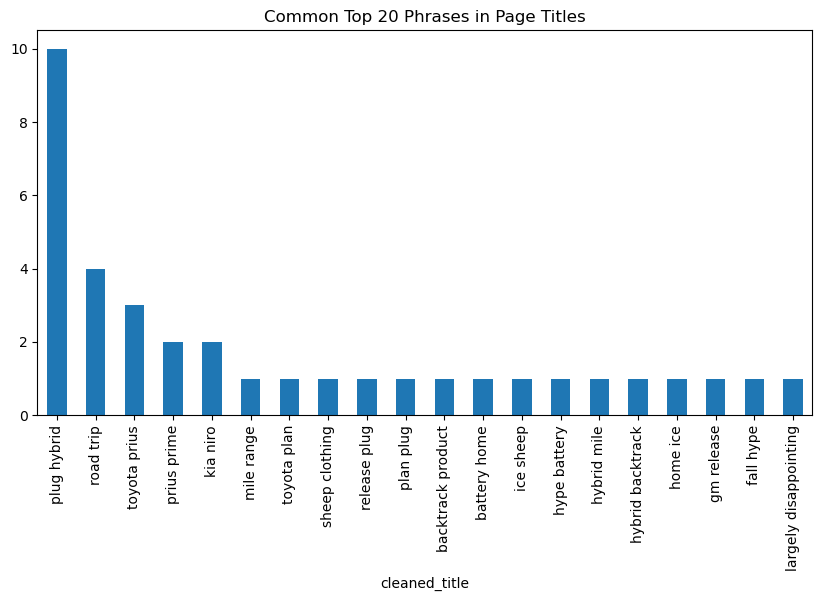

In [262]:

common_words = get_top_n_bigram(df_title['cleaned_title'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Common Top 20 Phrases in Page Titles')


toyota prius prime 2
fall hype battery 1
hype battery home 1
battery home ice 1
home ice sheep 1
ice sheep clothing 1
toyota plan plug 1
plan plug hybrid 1
plug hybrid mile 1
hybrid mile range 1
gm release plug 1
release plug hybrid 1
plug hybrid backtrack 1
hybrid backtrack product 1
backtrack product plan 1
unpopular opinion probably 1
opinion probably gasoline 1
probably gasoline hybrid 1
gasoline hybrid post 1
hybrid post allow 1


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_title'>

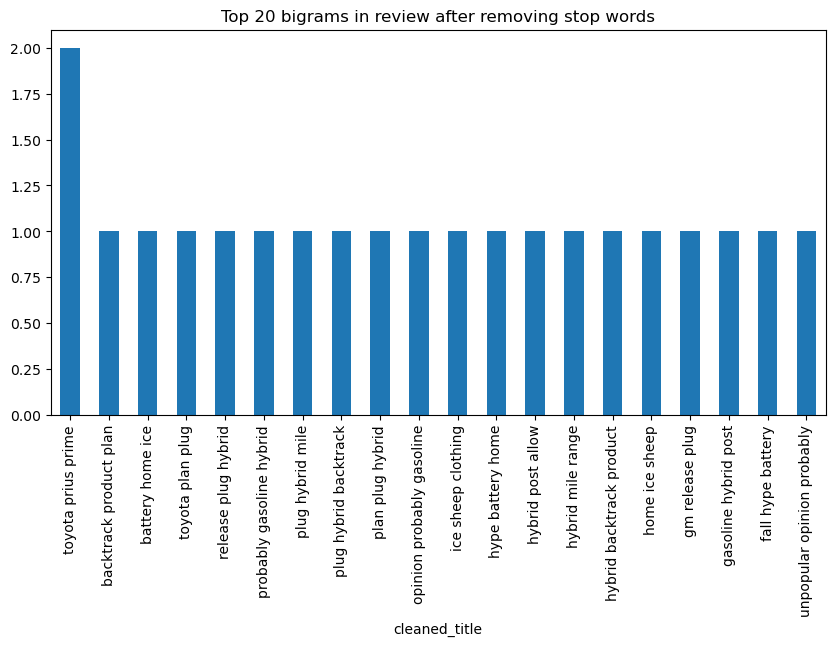

In [263]:

common_words = get_top_n_bigram(df_title['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


fall hype battery home 1
hype battery home ice 1
battery home ice sheep 1
home ice sheep clothing 1
toyota plan plug hybrid 1
plan plug hybrid mile 1
plug hybrid mile range 1
gm release plug hybrid 1
release plug hybrid backtrack 1
plug hybrid backtrack product 1
hybrid backtrack product plan 1
unpopular opinion probably gasoline 1
opinion probably gasoline hybrid 1
probably gasoline hybrid post 1
gasoline hybrid post allow 1
main reason people buy 1
reason people buy car 1
america plug hybrid good 1
plug hybrid good autopian 1
mis marketed misunderstand shame 1


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_title'>

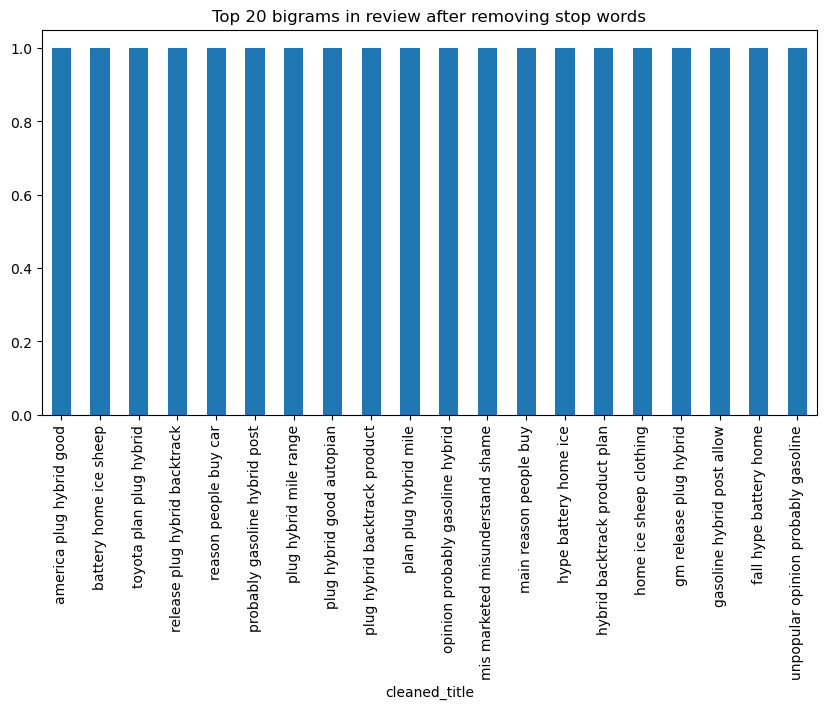

In [264]:

common_words = get_top_n_bigram(df_title['cleaned_title'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


In [265]:
word_counter = Counter()
for row in df_title[df_title['vader_sentiment'] > 0].to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_pos = pd.DataFrame(word_counter.most_common())
df_tf_pos.columns = ["term", "frequency"]
df_tf_pos

term  frequency
0        good          3
1     opinion          2
2      hybrid          2
3        plug          2
4   unpopular          1
5    probably          1
6    gasoline          1
7        post          1
8       allow          1
9     america          1
10     enough          1
11   autopian          1
12   american          1
13       help          1
14        fix          1
15        irs          1
16    qualify          1
17      drive          1
18      motor          1
19     credit          1
20        feb          1
21         th          1
22        bmw          1
23         ix          1
24      worth          1
25      great          1
26      still          1
27       road          1
28       trip          1
29       math          1

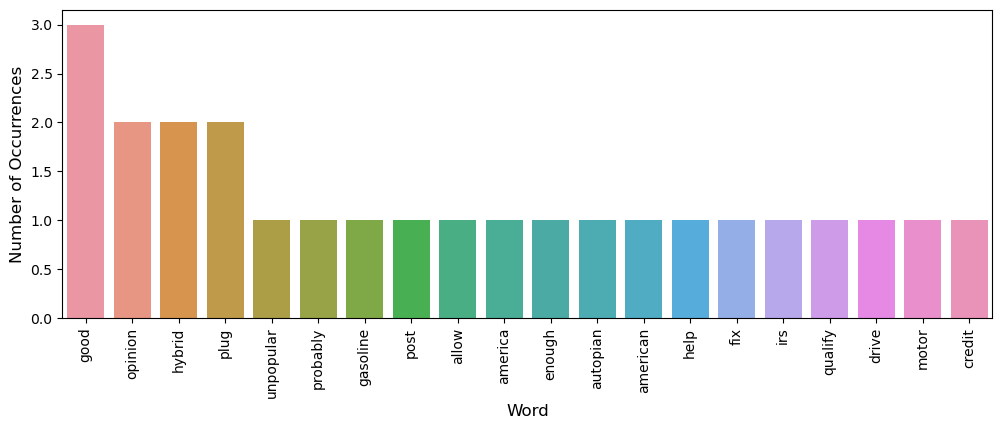

In [266]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_pos[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

unpopular opinion probably 1
opinion probably gasoline 1
probably gasoline hybrid 1
gasoline hybrid post 1
hybrid post allow 1
america plug hybrid 1
plug hybrid good 1
hybrid good autopian 1
american help fix 1
help fix irs 1
fix irs qualify 1
irs qualify plug 1
qualify plug drive 1
plug drive motor 1
drive motor credit 1
motor credit feb 1
credit feb th 1
bmw ix good 1
good road trip 1
road trip math 1


<Axes: title={'center': 'Positive Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

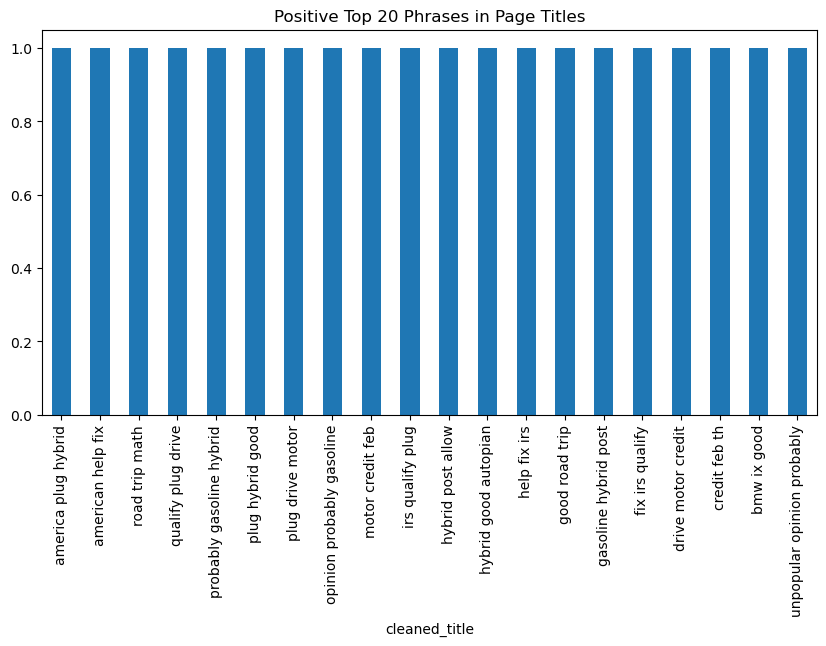

In [267]:

common_words = get_top_n_bigram(df_title[df_title['vader_sentiment'] > 0]['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Positive Top 20 Phrases in Page Titles')


toyota prius prime 2
fall hype battery 1
hype battery home 1
battery home ice 1
home ice sheep 1
ice sheep clothing 1
toyota plan plug 1
plan plug hybrid 1
plug hybrid mile 1
hybrid mile range 1
gm release plug 1
release plug hybrid 1
plug hybrid backtrack 1
hybrid backtrack product 1
backtrack product plan 1
main reason people 1
reason people buy 1
people buy car 1
previously post need 1
post need road 1


<Axes: title={'center': 'Neutral Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

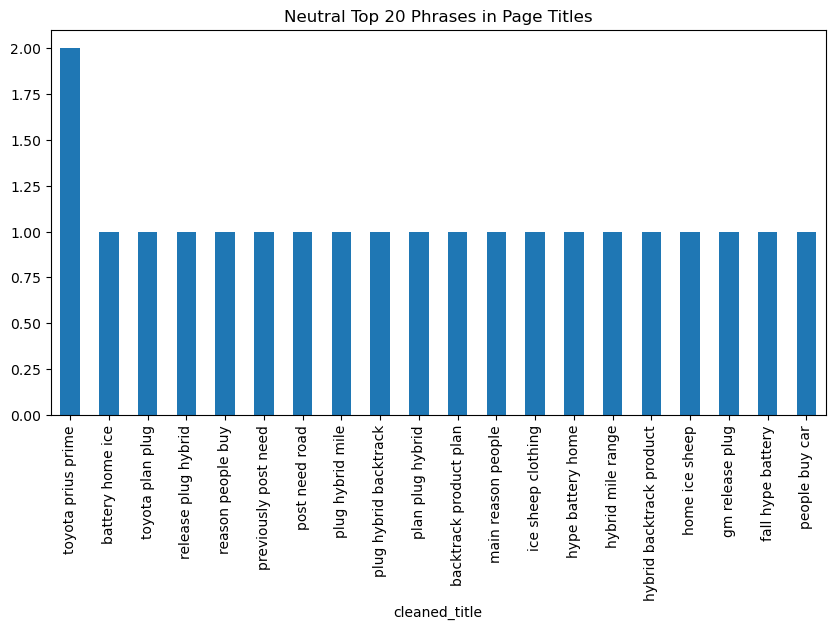

In [268]:

common_words = get_top_n_bigram(df_title[df_title['vader_sentiment'] == 0]['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Neutral Top 20 Phrases in Page Titles')


mis marketed misunderstand 1
marketed misunderstand shame 1
oregon follow california 1
follow california ban 1
california ban combustion 1
ban combustion new 1
combustion new car 1
new car sale 1
car sale plug 1
sale plug hybrid 1
plug hybrid gas 1
hybrid gas diesel 1
gas diesel engine 1
diesel engine exception 1
engine exception rule 1
driver jeep kia 1
jeep kia plug 1
kia plug hybrid 1
plug hybrid charge 1
hybrid charge seriously 1


<Axes: title={'center': 'Negative Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

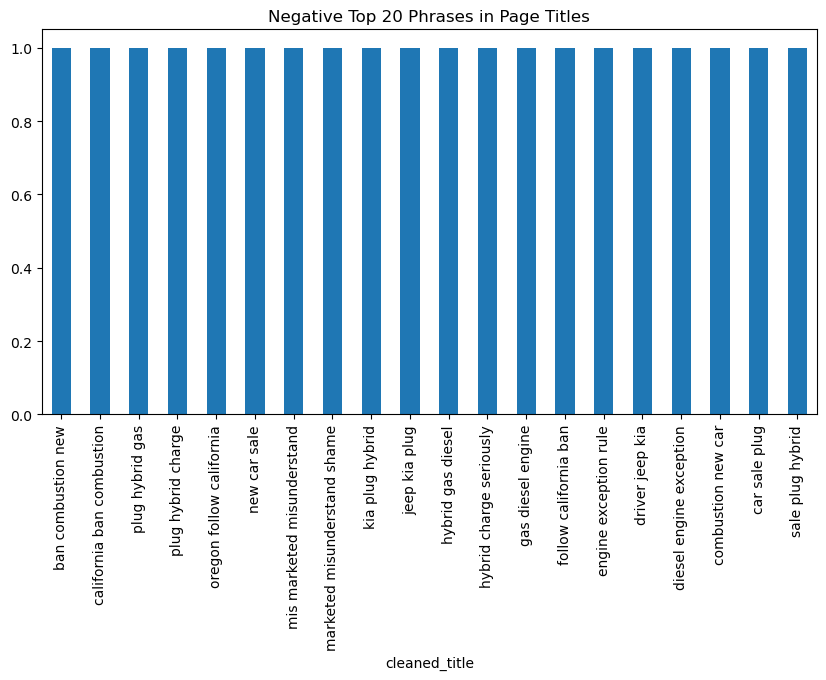

In [269]:

common_words = get_top_n_bigram(df_title[df_title['vader_sentiment'] < 0]['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Negative Top 20 Phrases in Page Titles')


In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [271]:
reindexed_data = df_title['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
# reindexed_data

In [272]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [273]:
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_model

TruncatedSVD(n_components=6)

In [274]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [275]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [276]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [277]:
import numpy as np

In [278]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  plug hybrid plan
Topic 2:  prius toyota prime
Topic 3:  trip road good
Topic 4:  niro kia bad
Topic 5:  opinion avoid worth
Topic 6:  largely owner disappointing


In [279]:
word_counter = Counter()
for row in df_title[df_title['vader_sentiment'] == 0].to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_nut = pd.DataFrame(word_counter.most_common())
df_tf_nut.columns = ["term", "frequency"]
df_tf_nut

term  frequency
0       plug          5
1     hybrid          5
2     toyota          4
3       road          3
4       trip          3
..       ...        ...
70  leapfrog          1
71       see          1
72     place          1
73      near          1
74    future          1

[75 rows x 2 columns]

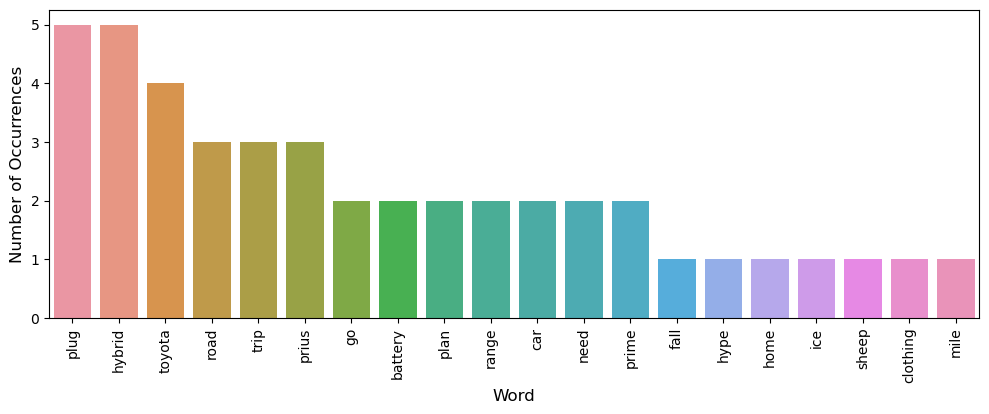

In [280]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_nut[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [281]:
word_counter = Counter()
for row in df_title[df_title['vader_sentiment'] < 0].to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_neg = pd.DataFrame(word_counter.most_common())
df_tf_neg.columns = ["term", "frequency"]
df_tf_neg

term  frequency
0            plug          4
1          hybrid          4
2             kia          3
3              go          2
4            niro          2
5         largely          1
6   disappointing          1
7             mis          1
8        marketed          1
9   misunderstand          1
10          shame          1
11         oregon          1
12         follow          1
13     california          1
14            ban          1
15     combustion          1
16            new          1
17            car          1
18           sale          1
19            gas          1
20         diesel          1
21         engine          1
22      exception          1
23           rule          1
24         driver          1
25           jeep          1
26           take          1
27         charge          1
28      seriously          1
29         matter          1
30       mercedes          1
31           stop          1
32        develop          1
33           tech          1
34        pricing          1
35          start          1
36     girlfriend          1
37            get          1
38        excited          1
39      something          1
40          least          1
41      partially          1
42          avoid          1
43            bad          1
44            mpg          1
45          owner          1
46         regret          1
47           full          1

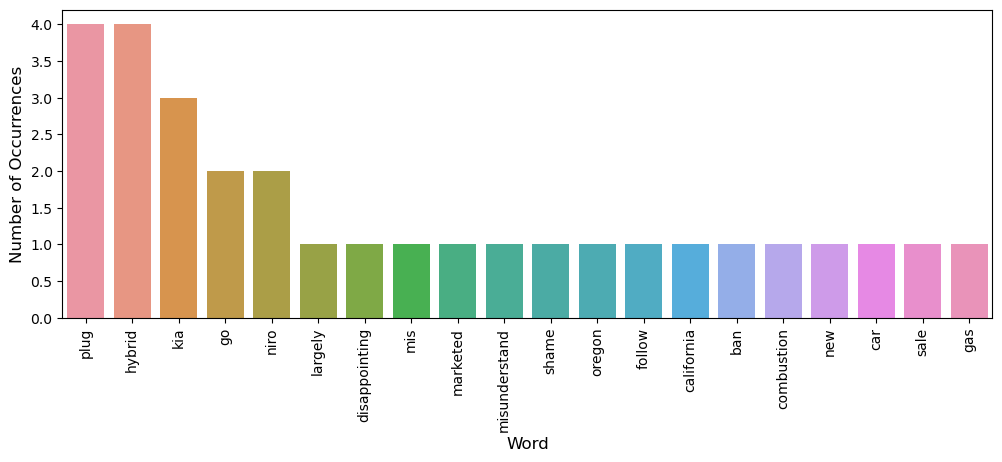

In [282]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_neg[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Topic 1:  plug hybrid plan
Topic 2:  prius toyota prime
Topic 3:  trip road worth
Topic 4:  niro kia largely
Topic 5:  opinion avoid great
Topic 6:  car people buy


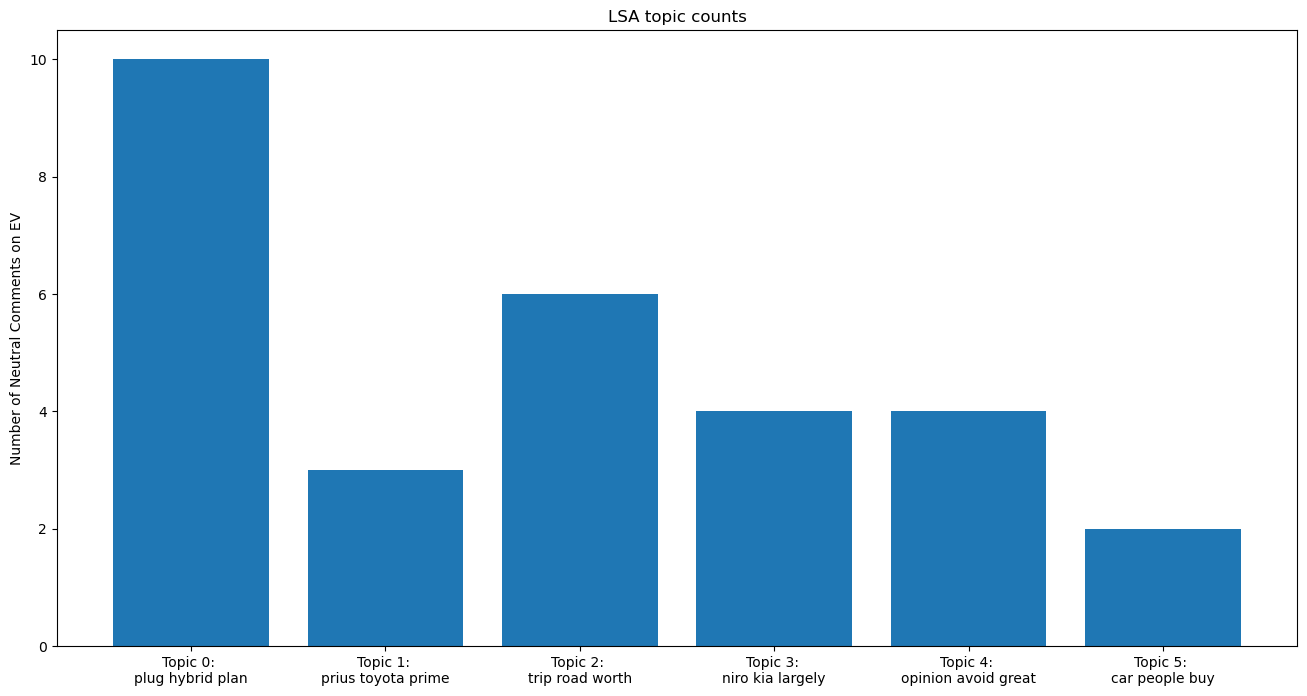

In [283]:
reindexed_data = df_title['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  hybrid plug range
Topic 2:  prius toyota year
Topic 3:  main buy reason
Topic 4:  trip road need


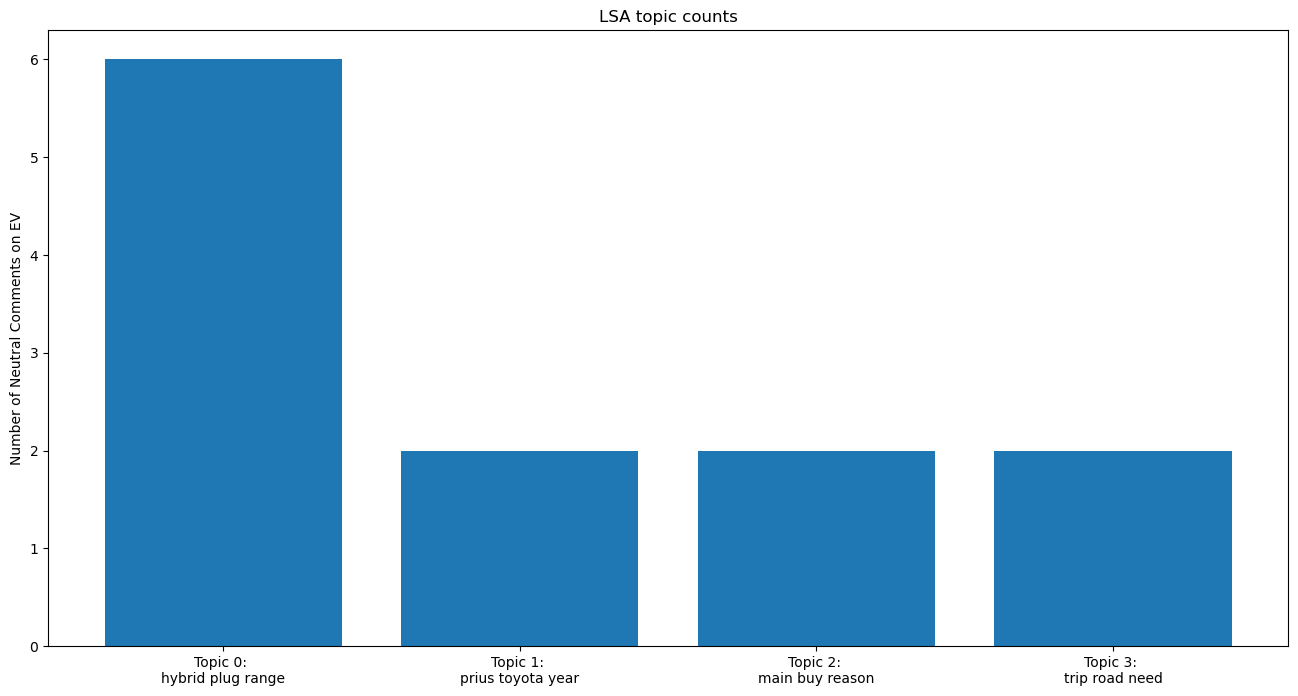

In [285]:
reindexed_data = df_title[df_title['vader_sentiment'] == 0]['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 4
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  good bmw ix
Topic 2:  opinion great allow
Topic 3:  drive help th
Topic 4:  worth unpopular america


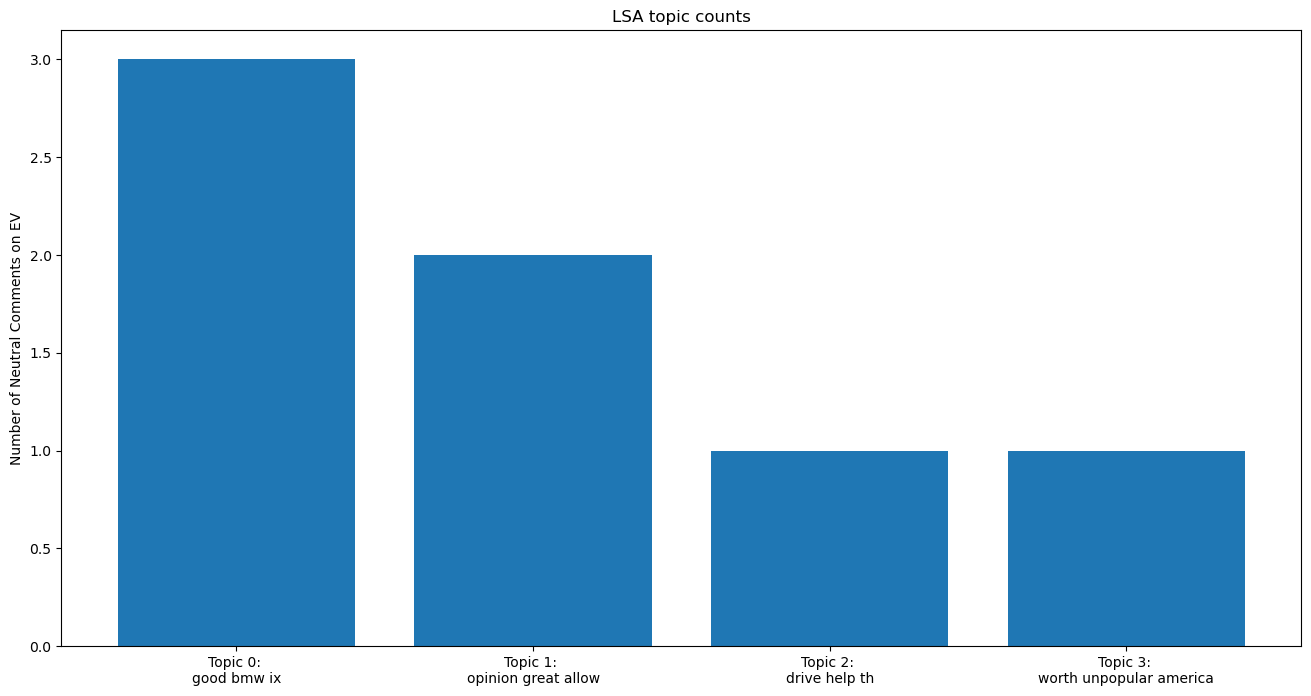

In [289]:
reindexed_data = df_title[df_title['vader_sentiment'] > 0]['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 4
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  hybrid plug largely
Topic 2:  bad mpg girlfriend
Topic 3:  avoid regret owner


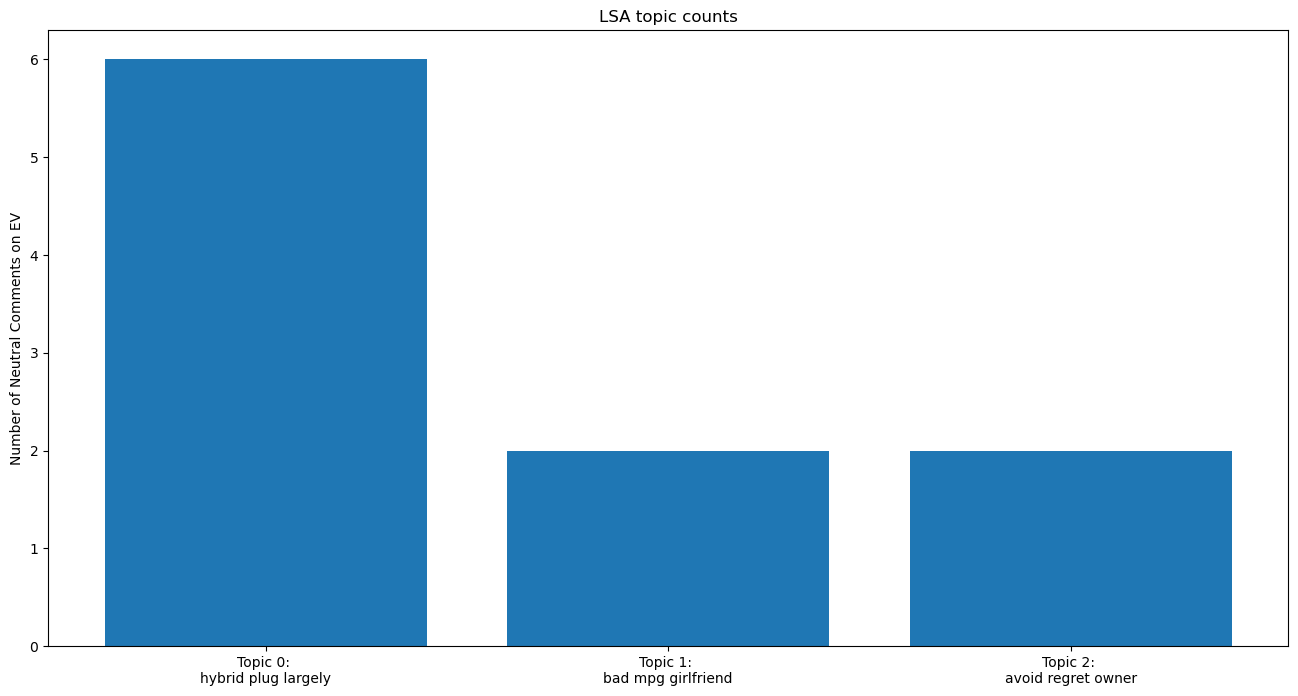

In [290]:
reindexed_data = df_title[df_title['vader_sentiment'] < 0]['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 3
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

# Question

In [291]:
df_question = df[df['Type'] == 'Question'][['comment_body','comment_created_utc']]
df_question.head()

comment_body comment_created_utc
0  Or just get the car that best suits your need.... 2024-05-06 06:48:49
1  My experience differs from the point of this p... 2024-05-06 10:09:36
2  PHEV's let most people realize most of the ben... 2024-05-06 07:19:43
3  Counter-point: If you are scared about going e... 2024-05-06 06:58:40
4  This is nonsense. I drive an EV but we have tw... 2024-05-06 07:44:15

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

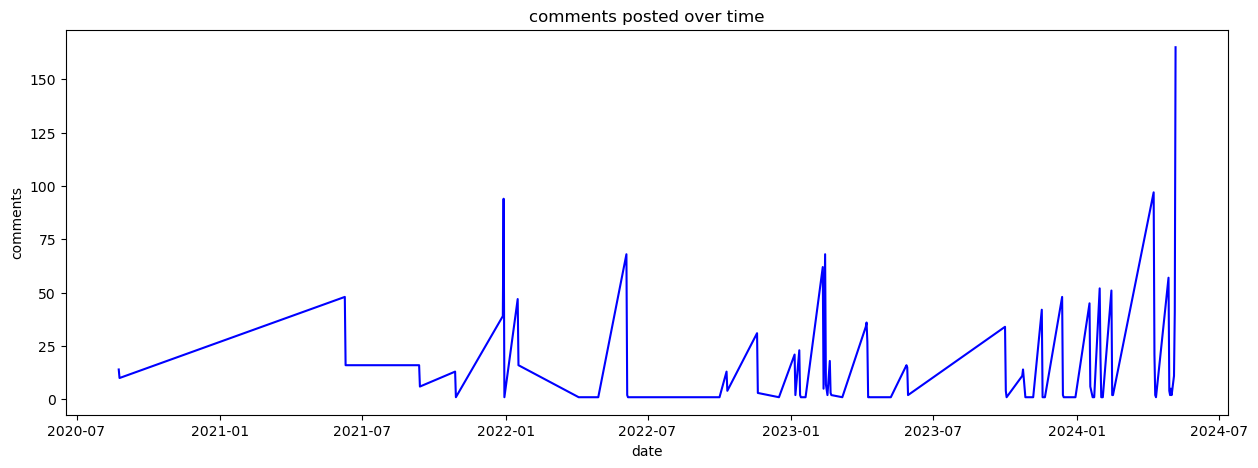

In [292]:
df_question.groupby(df_question["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="b",figsize = (15,5))

In [293]:
df_question['cleaned_question'] = df_question['comment_body'].apply(lambda x: preprocessing_text(x))
df_question['cleaned_question'] = df_question['cleaned_question'].apply(lambda x: word_stemmer(x))
df_question['cleaned_question'] = df_question['cleaned_question'].apply(lambda x: stop_words(x))
df_question.head()

comment_body comment_created_utc  \
0  Or just get the car that best suits your need.... 2024-05-06 06:48:49   
1  My experience differs from the point of this p... 2024-05-06 10:09:36   
2  PHEV's let most people realize most of the ben... 2024-05-06 07:19:43   
3  Counter-point: If you are scared about going e... 2024-05-06 06:58:40   
4  This is nonsense. I drive an EV but we have tw... 2024-05-06 07:44:15   

                                    cleaned_question  
0  get car best suit need someone home charger dr...  
1  experience differs point post buy chevy volt c...  
2  let people realize benefit without change habi...  
3  counter point scar go least go low cost drive ...  
4  nonsense drive two car family second question ...

In [294]:
print(len(df_question))
df_question.drop_duplicates('cleaned_question',inplace=True)
print(len(df_question))

1557
1548


In [295]:
question_combined =''
for each in df_question['cleaned_question']:
    question_combined = question_combined + " " + each
print(question_combined)

 get car best suit need someone home charger drive mile day long trip every week fast charger plenty great fit experience differs point post buy chevy volt carvana cost mile get mile mode suit perfectly never travel ish mile per day time ice engine ever kick maintenance road trip happen dozen time per year accord chevrolet app approximately mile ever driven mode incredible saving gas year moreover sit tell operate volt bad ice lol might well drive dodge ram hemi amirite lol silly goose way green operate volt country mile let people realize benefit without change habit outside plug night plenty people traditional hybrid ice good choice make bad choice even people argue cheap comparable give doubter wary charge range anxiety security need pull trigger main problem good available really great one toyota rav prime prius prime mass market also decent high market luxury option volvo xc xc get market think lose plot unless either much hate money counter point scar go least go low cost drive e

In [296]:
doc = nlp(question_combined[:1000000])

df_ner_ques = pd.DataFrame(columns=['Text','Label'])

for ent in doc.ents:
    df_ner_ques.loc[len(df_ner_ques)]  = [ent.text, ent.label_]
#     break
df_ner_ques.head()

Text     Label
0                    every week      DATE
1  chevy volt carvana cost mile       ORG
2                         dozen  CARDINAL
3                     chevrolet       ORG
4            approximately mile  QUANTITY

In [297]:

for each in df_ner_ques['Label'].unique():
    print(each)
    xorg = df_ner_ques[df_ner_ques['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

DATE
year         84
daily        68
winter       30
today        26
day          22
month        17
last year    16
next year    15
every day    15
year ago     12
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORG
toyota      119
gm           44
ford         36
kia          25
bmw          16
nissan       11
chrysler     11
hyundai       9
honda         6
epa           5
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
CARDINAL
one         214
two          65
half         31
zero         24
gallon       16
million       5
three         5
thousand      5
four          5
one two       4
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
QUANTITY
gallon                7
around mile           6
mile                  4
mile mile             3
every mile         

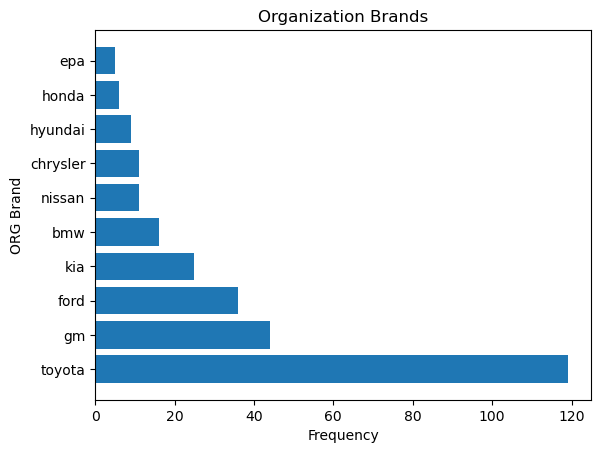

In [298]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='ORG']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("ORG Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("Organization Brands")
plt.show()

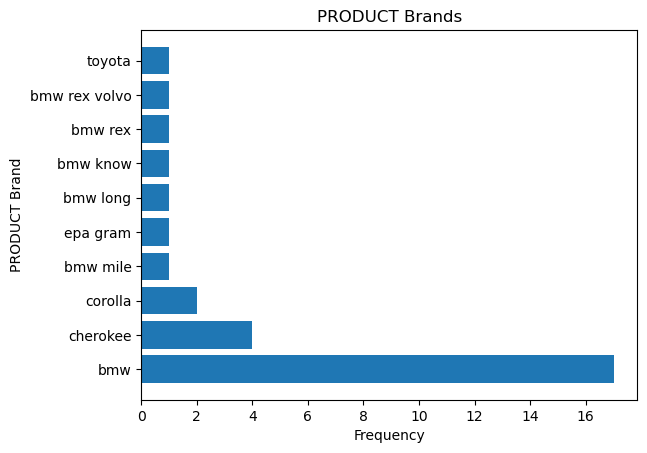

In [299]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='PRODUCT']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("PRODUCT Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("PRODUCT Brands")
plt.show()

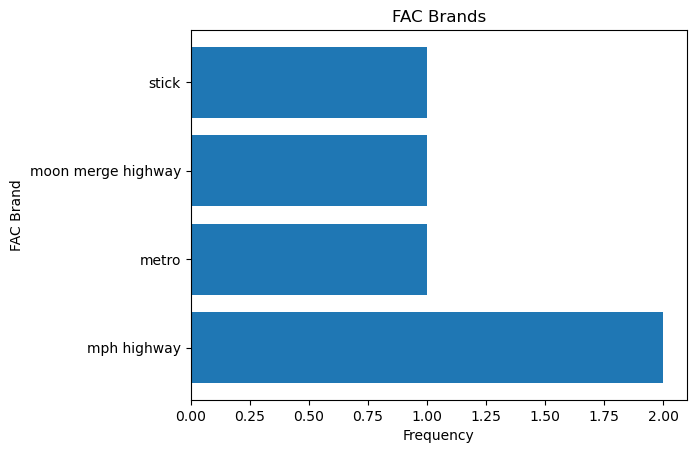

In [300]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='FAC']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("FAC Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("FAC Brands")
plt.show()

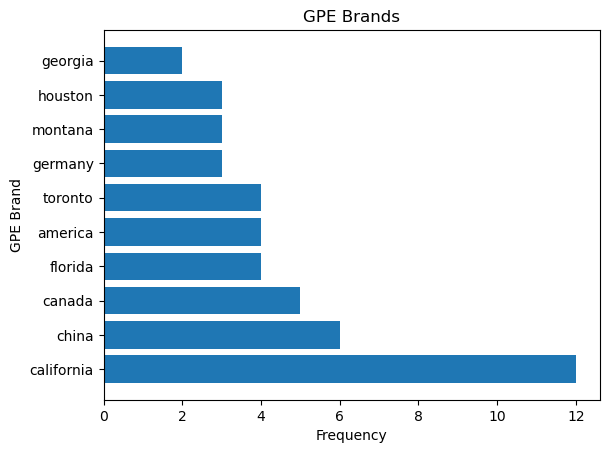

In [301]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='GPE']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("GPE Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("GPE Brands")
plt.show()

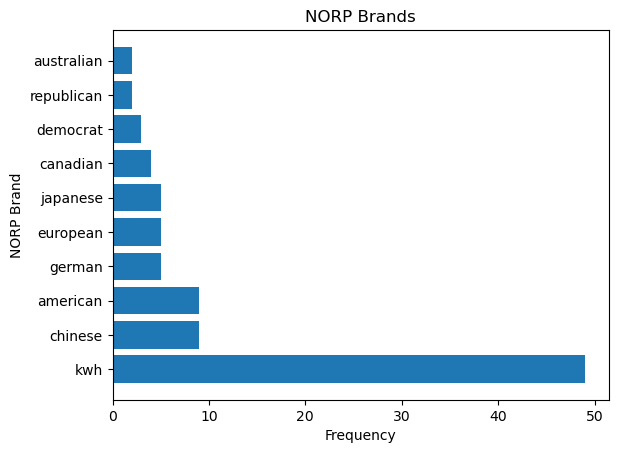

In [302]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='NORP']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("NORP Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("NORP Brands")
plt.show()

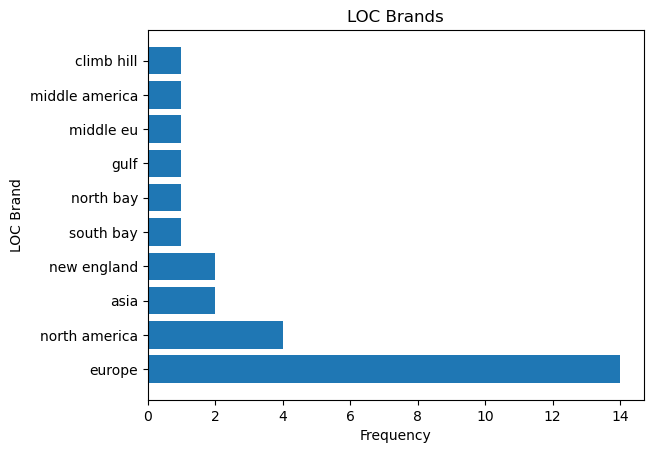

In [303]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='LOC']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("LOC Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("LOC Brands")
plt.show()

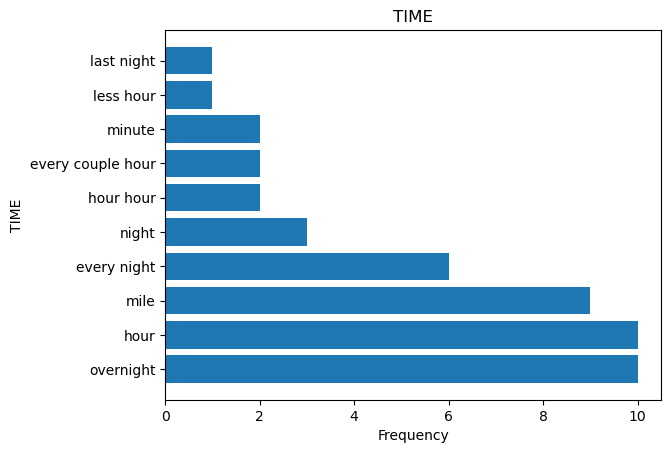

In [304]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='TIME']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("TIME")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("TIME")
plt.show()

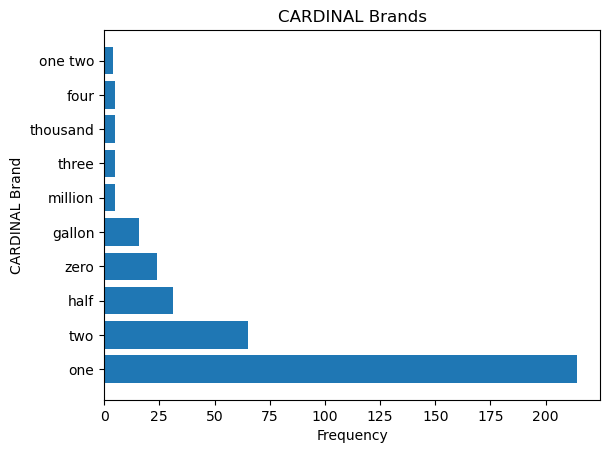

In [305]:
name_val = 'CARDINAL'
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

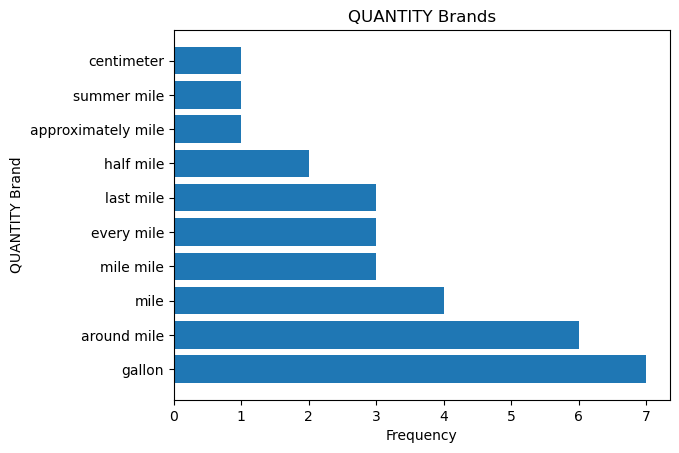

In [306]:
name_val = 'QUANTITY'
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

In [307]:
word_counter = Counter()
for row in df_question.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_question"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_ques = pd.DataFrame(word_counter.most_common())
df_tf_ques.columns = ["term", "frequency"]
df_tf_ques

term  frequency
0               car        789
1               get        641
2             range        595
3              mile        572
4            charge        542
...             ...        ...
4933           ceed          1
4934             sw          1
4935      terminate          1
4936  profitability          1
4937      liability          1

[4938 rows x 2 columns]

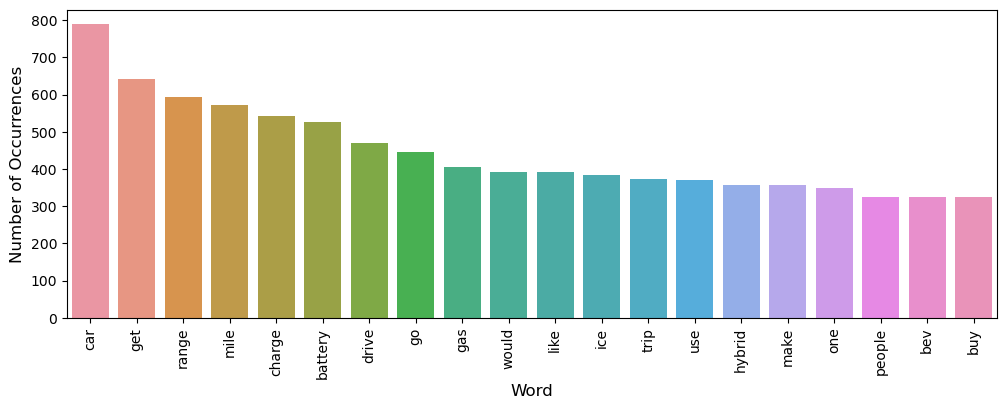

In [308]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_ques[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

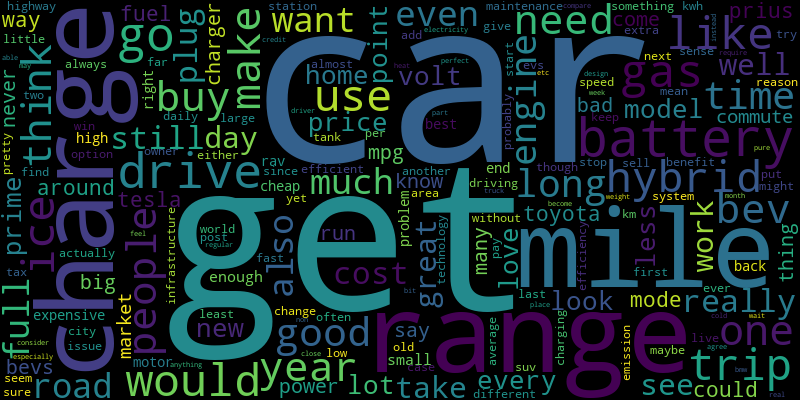

In [309]:

cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image_que = cloud.to_image()
image_que

In [310]:
documents = [comment.split() for comment in df_question['cleaned_question']]
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.024*"car" + 0.012*"make" + 0.011*"hybrid" + 0.009*"drive" + '
  '0.009*"charge" + 0.009*"get" + 0.008*"year" + 0.008*"ice" + 0.008*"even" + '
  '0.008*"buy"'),
 (1,
  '0.012*"mile" + 0.011*"drive" + 0.011*"get" + 0.011*"gas" + 0.010*"need" + '
  '0.010*"car" + 0.009*"charge" + 0.008*"make" + 0.008*"battery" + '
  '0.008*"engine"'),
 (2,
  '0.020*"range" + 0.015*"battery" + 0.015*"car" + 0.014*"charge" + '
  '0.014*"drive" + 0.011*"get" + 0.011*"trip" + 0.009*"mile" + 0.009*"gas" + '
  '0.009*"year"'),
 (3,
  '0.011*"gas" + 0.010*"get" + 0.009*"like" + 0.009*"charge" + 0.009*"one" + '
  '0.009*"ice" + 0.008*"hybrid" + 0.007*"car" + 0.007*"people" + '
  '0.007*"drive"'),
 (4,
  '0.017*"car" + 0.012*"gas" + 0.011*"use" + 0.011*"range" + 0.011*"battery" + '
  '0.011*"get" + 0.008*"bev" + 0.008*"need" + 0.008*"like" + 0.007*"mile"'),
 (5,
  '0.017*"mile" + 0.016*"go" + 0.014*"get" + 0.013*"range" + 0.012*"would" + '
  '0.012*"car" + 0.010*"think" + 0.010*"buy" + 0.010*"ice" + 0.00

<Axes: title={'center': 'Comments/Question'}, ylabel='Frequency'>

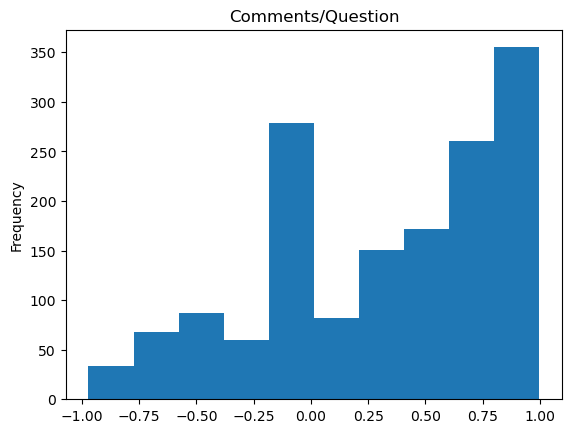

In [311]:
sia = SentimentIntensityAnalyzer()
def score_vader(row):
    text = row["cleaned_question"]
    return sia.polarity_scores(text)["compound"]

df_question["vader_sentiment"] = df_question.apply(score_vader, axis=1)
df_question["vader_sentiment"].plot(kind="hist",title = "Comments/Question")

In [312]:
print("Positive Question Count - " + str(len(df_question[df_question['vader_sentiment'] > 0])))
print("Neutral Question Count - " + str(len(df_question[df_question['vader_sentiment'] == 0])))
print("Negative Question Count - " + str(len(df_question[df_question['vader_sentiment'] < 0])))

Positive Question Count - 1020
Neutral Question Count - 208
Negative Question Count - 320


road trip 160
mile range 128
rav prime 71
long trip 68
make sense 59
prius prime 55
charge home 47
gas engine 43
ice car 42
plug hybrid 42
drive mile 41
tax credit 39
charge infrastructure 37
gas car 36
mile day 33
use case 33
battery range 33
range anxiety 31
use gas 31
buy car 30


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

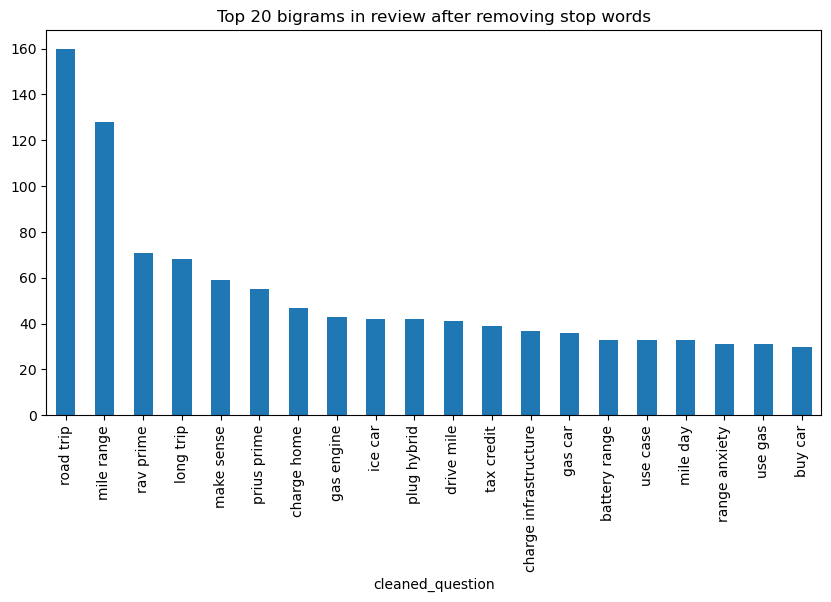

In [313]:

common_words = get_top_n_bigram(df_question['cleaned_question'], 20,2)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


drive mile day 18
long road trip 18
mile road trip 9
mile battery range 9
buy new car 9
mile range charge 7
make lot sense 7
gas road trip 7
like mile range 7
mile round trip 7
rav prime owner 6
mile range battery 6
mile range mile 6
road trip car 6
dc fast charge 5
plug hybrid mile 5
drive long distance 5
long distance trip 5
qualify tax credit 5
car mile range 5


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

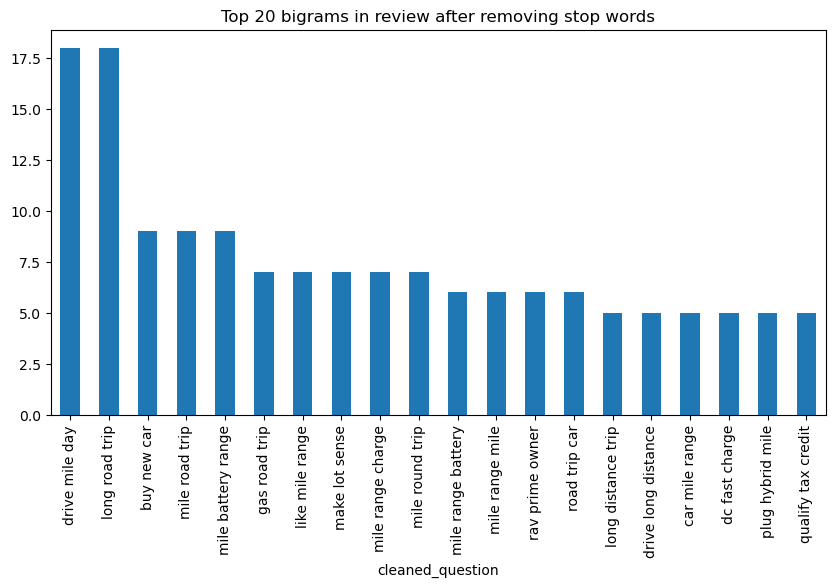

In [314]:

common_words = get_top_n_bigram(df_question['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


price gasoline price diesel 4
electricity ghg fuel car 4
rav prime prius prime 3
commuter drive mile day 3
people buy new car 3
access home charge make 2
charge home drive mile 2
km average fuel consumption 2
average fuel consumption km 2
greatly reduce fuel cost 2
reduce fuel cost make 2
use gas road trip 2
drive mile round trip 2
non tesla dc fast 2
tesla dc fast charge 2
charge drive long distance 2
buy plug hybrid need 2
make sense year ago 2
range poor fuel economy 2
plug hybrid range extender 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

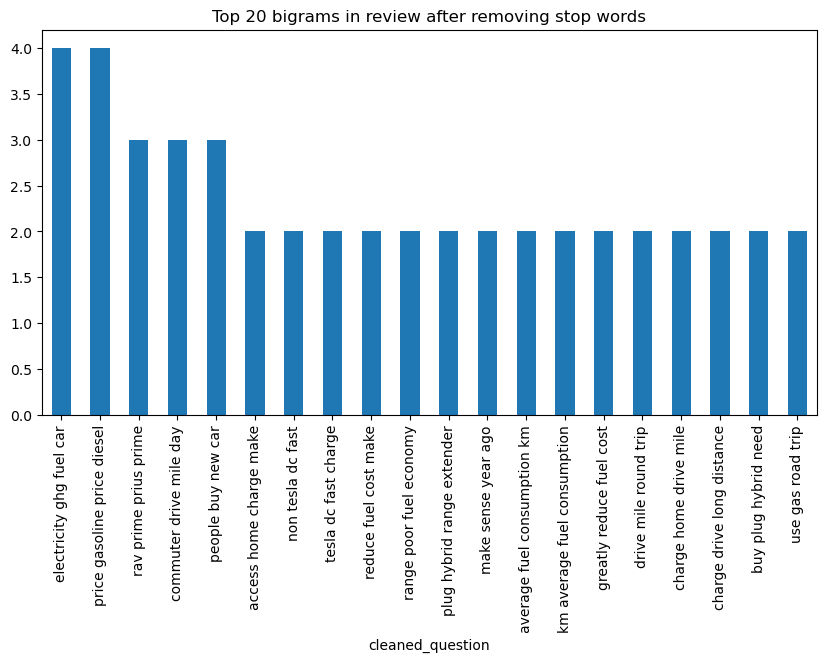

In [315]:

common_words = get_top_n_bigram(df_question['cleaned_question'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


long trip expensive 2
mile round trip 2
use case author 1
buy prius prime 1
say year mileage 1
year mileage mile 1
mileage mile gas 1
mile gas afford 1
heard resonate world 1
resonate world hybrid 1
world hybrid addict 1
hybrid addict oil 1
mile used gallon 1
ice maintenance everybody 1
maintenance everybody fuss 1
everybody fuss buck 1
fuss buck oil 1
buck oil mile 1
oil mile belt 1
mile belt plug 1


<Axes: title={'center': 'Neutral Top 20 Phrases for comments/Question'}, xlabel='cleaned_question'>

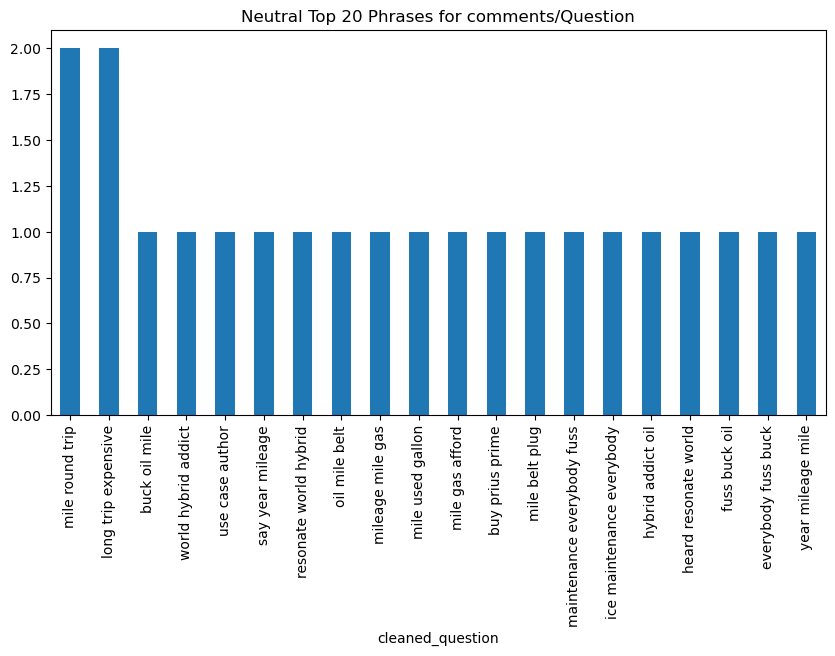

In [316]:

common_words = get_top_n_bigram(df_question[df_question['vader_sentiment'] == 0]['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Neutral Top 20 Phrases for comments/Question')


drive mile day 18
long road trip 16
mile battery range 9
mile road trip 8
mile range charge 7
make lot sense 7
like mile range 7
gas road trip 6
rav prime owner 6
mile range battery 6
mile range mile 6
road trip car 6
dc fast charge 5
mile round trip 5
buy new car 5
long distance trip 5
qualify tax credit 5
road trip year 5
charge home drive 4
battery mile range 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

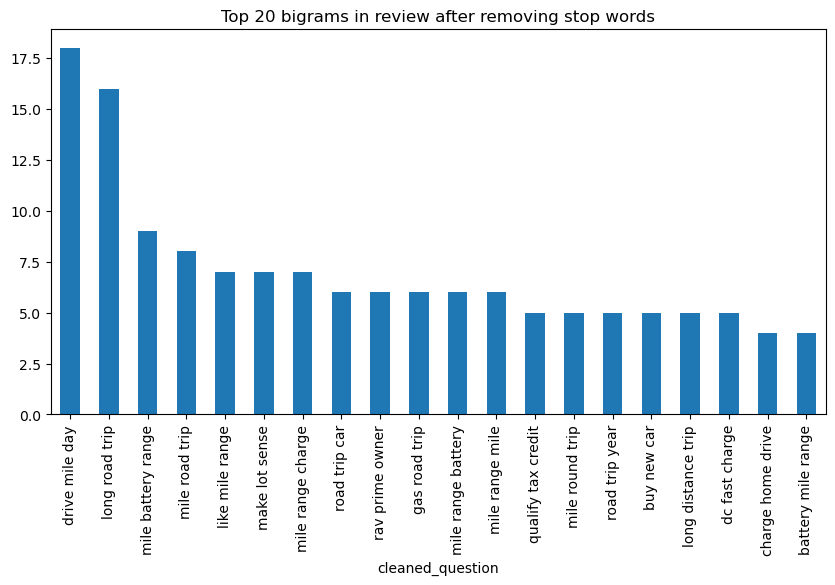

In [317]:

common_words = get_top_n_bigram(df_question[df_question['vader_sentiment'] > 0]['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


buy new car 4
buy car right 3
rav prime prius 2
prime prius prime 2
make sense lot 2
hybrid mild hybrid 2
range poor fuel 2
poor fuel economy 2
sell rav prime 2
bolt pack fail 2
plug hybrid silverado 2
transmission oil change 2
people buy new 2
time buy car 2
people afraid change 2
long road trip 2
new petrol diesel 2
pollute harmful environment 2
lack charge infrastructure 2
new car buyer 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

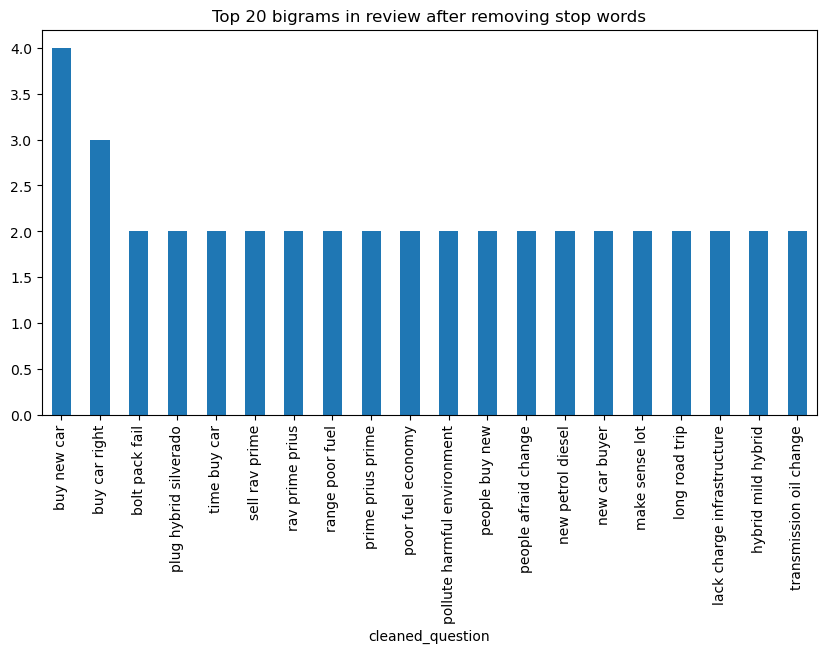

In [318]:

common_words = get_top_n_bigram(df_question[df_question['vader_sentiment'] < 0]['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


Topic 1:  car range mile
Topic 2:  mile range trip
Topic 3:  battery hybrid engine
Topic 4:  prime prius rav
Topic 5:  hybrid mpg toyota
Topic 6:  bev love ice
Topic 7:  bev opinion compare
Topic 8:  buy plug price
Topic 9:  cost gas price
Topic 10:  toyota volt good


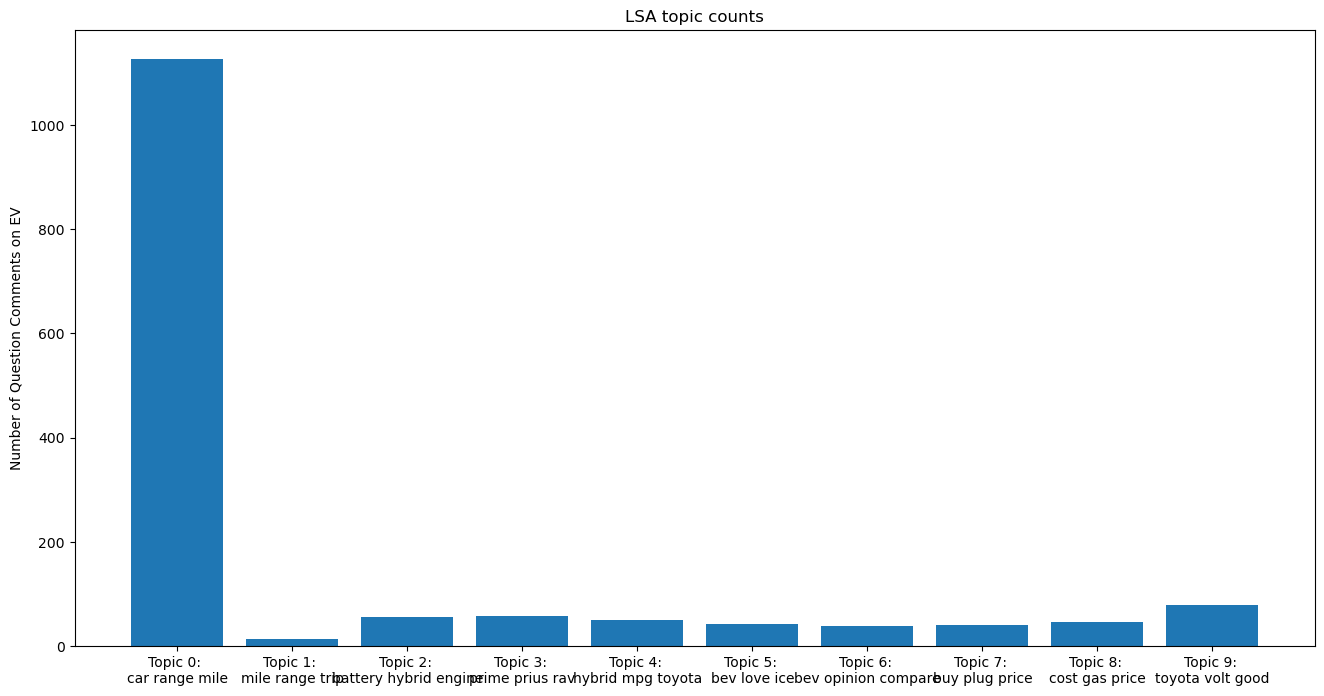

In [319]:
reindexed_data = df_question['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Question Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  mile range price
Topic 2:  buy people burner
Topic 3:  sense plug make
Topic 4:  bev bmw hev
Topic 5:  cost plan break
Topic 6:  toyota right markup
Topic 7:  car use gas
Topic 8:  way expensive compare
Topic 9:  volt time absolutely
Topic 10:  charge kwh cheap


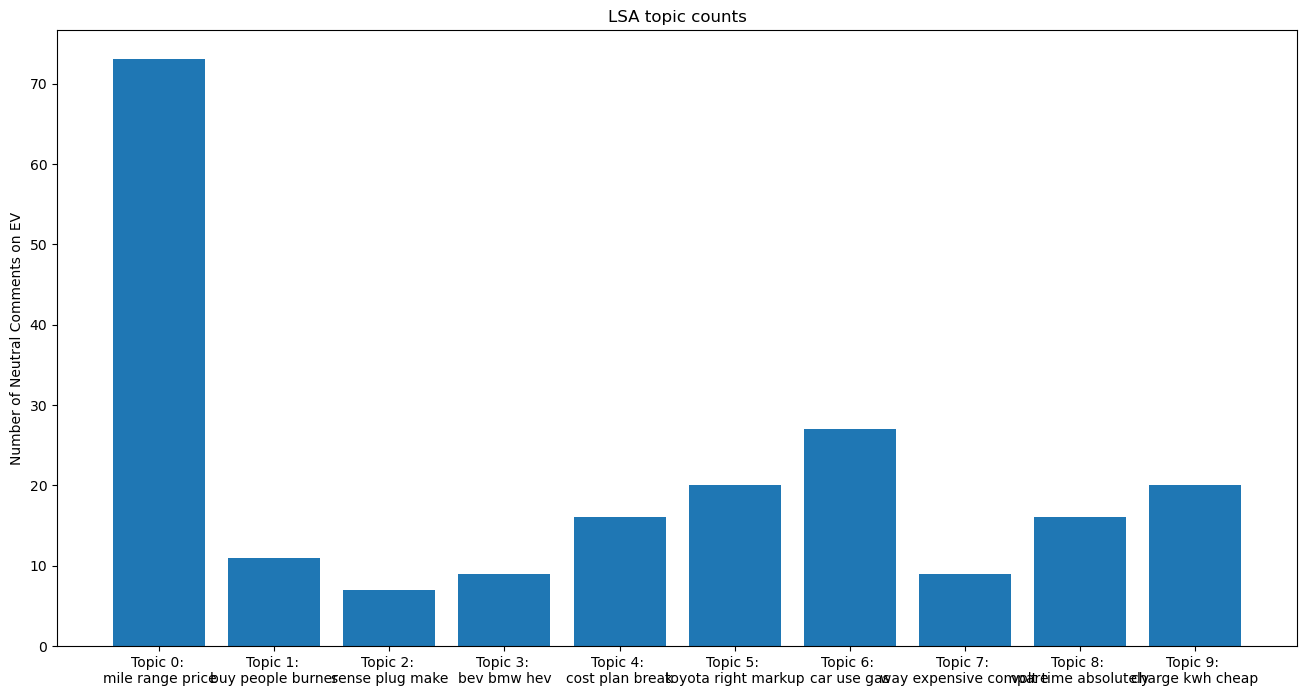

In [320]:
reindexed_data = df_question[df_question['vader_sentiment'] == 0]['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car mile range
Topic 2:  mile range tow
Topic 3:  battery kwh like
Topic 4:  love prime prius
Topic 5:  hybrid mpg rav
Topic 6:  charge live home
Topic 7:  great look like
Topic 8:  buy volt plug
Topic 9:  good volt credit
Topic 10:  hybrid post bev


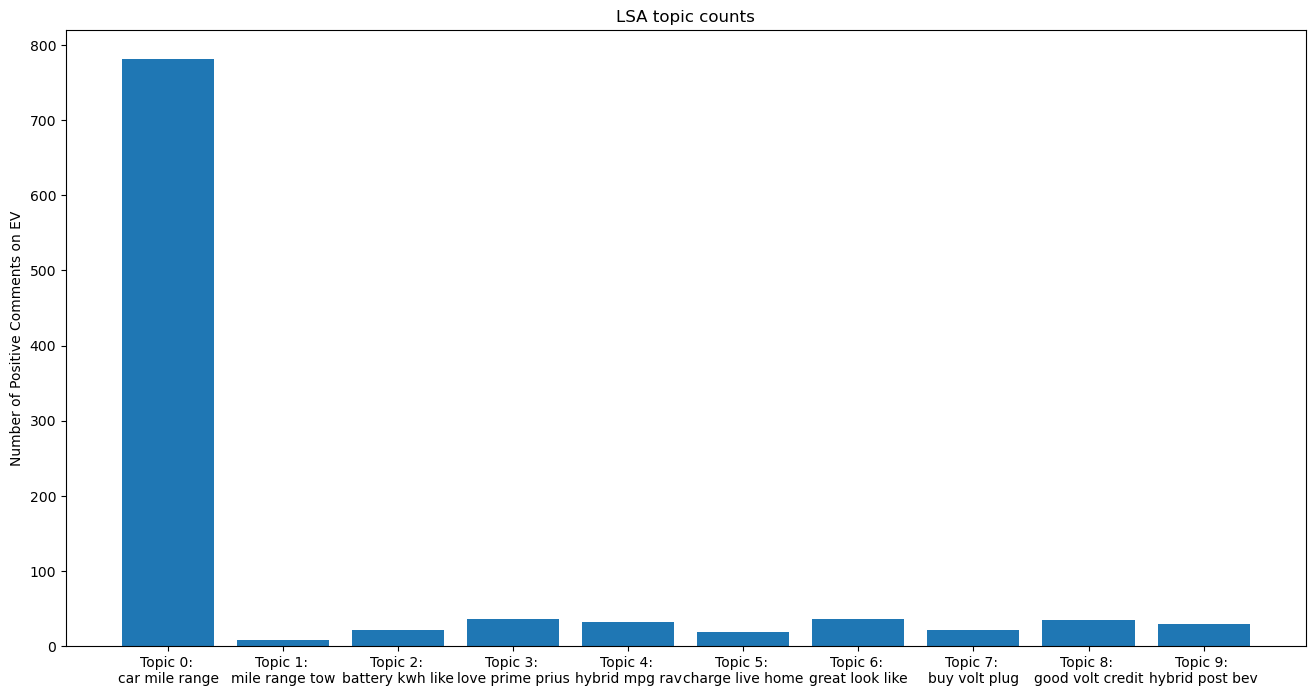

In [321]:
reindexed_data = df_question[df_question['vader_sentiment'] > 0]['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
    
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Positive Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car range battery
Topic 2:  look buy people
Topic 3:  ugly leave issue
Topic 4:  bad world ice
Topic 5:  prius ban prime
Topic 6:  hybrid fuck fud
Topic 7:  gas maintenance pas
Topic 8:  toyota chinese charge
Topic 9:  price bad like
Topic 10:  big come car


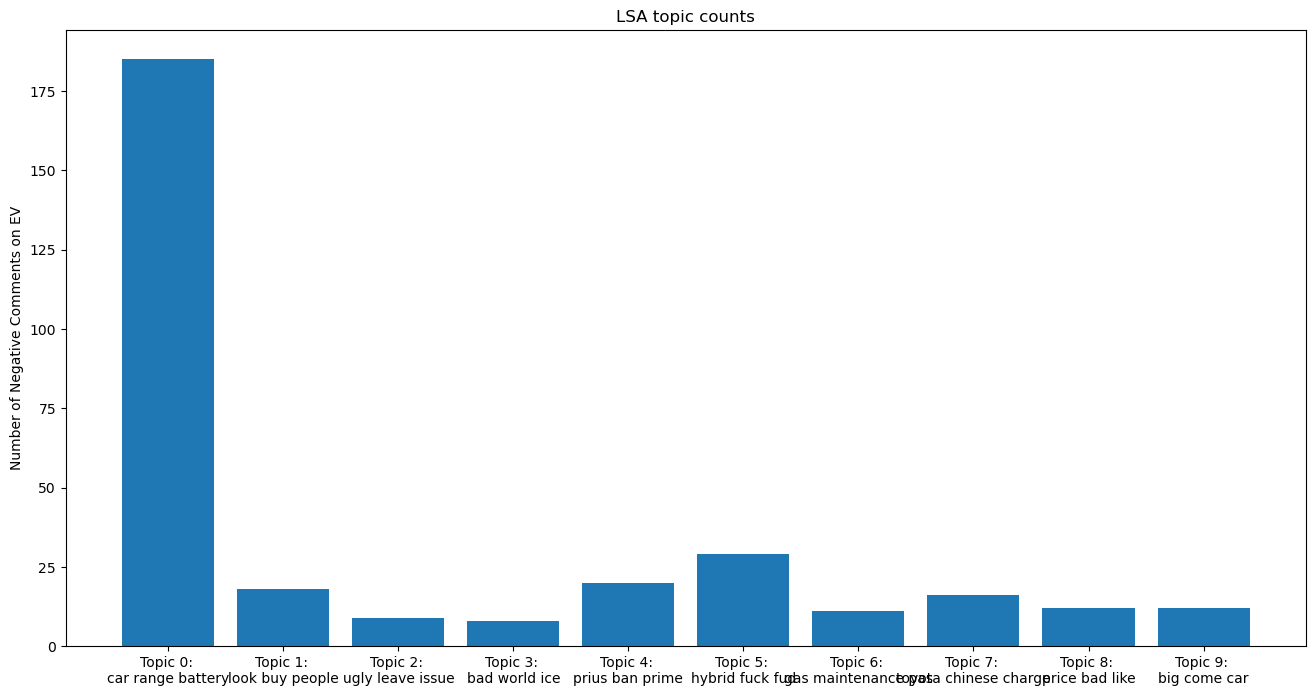

In [322]:
reindexed_data = df_question[df_question['vader_sentiment'] < 0]['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
    
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Negative Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

# Reply

In [323]:
df_reply= df[df['Type'] == 'Reply'][['comment_body','comment_created_utc']]
df_reply.head()

comment_body comment_created_utc
163  That's me. I have a Toyota Rav4 Prime that I a... 2024-05-06 13:09:30
164  Ding. My parents are boomers and can’t/won’t l... 2024-05-06 09:23:55
165  Yeah this "article" is lazy stupid trash. PHEV... 2024-05-06 13:04:27
166  Our Pacifica PHEV would be the perfect counter... 2024-05-06 14:28:16
167  Yup, this is my case. A deposit lasts about 2 ... 2024-05-06 09:04:50

In [324]:
df_reply['cleaned_reply'] = df_reply['comment_body'].apply(lambda x: preprocessing_text(x))
df_reply['cleaned_reply'] = df_reply['cleaned_reply'].apply(lambda x: word_stemmer(x))
df_reply['cleaned_reply'] = df_reply['cleaned_reply'].apply(lambda x: stop_words(x))
df_reply.head()

comment_body comment_created_utc  \
163  That's me. I have a Toyota Rav4 Prime that I a... 2024-05-06 13:09:30   
164  Ding. My parents are boomers and can’t/won’t l... 2024-05-06 09:23:55   
165  Yeah this "article" is lazy stupid trash. PHEV... 2024-05-06 13:04:27   
166  Our Pacifica PHEV would be the perfect counter... 2024-05-06 14:28:16   
167  Yup, this is my case. A deposit lasts about 2 ... 2024-05-06 09:04:50   

                                         cleaned_reply  
163  toyota rav prime absolutely love get mile full...  
164  ding parent boomer win learn new thing away ho...  
165  yeah article lazy stupid trash great need let ...  
166  pacifica would perfect counterpart polestar bi...  
167                        yup case deposit last month

In [325]:
print(len(df_reply))
df_reply.drop_duplicates('cleaned_reply',inplace=True)
print(len(df_reply))

6046
5994


In [326]:
reply_combined =''
for each in df_reply['cleaned_reply']:
    reply_combined = reply_combined + " " + each
print(reply_combined)

 toyota rav prime absolutely love get mile full charge get day month also solar home home charging free acceleration power great hybrid mode time mode use gas twice month tend go long trip able use gasoline help would disingenuous say charge quick easy fill gas tank long trips hour drive roughly mile added time charge could often mean difference stay overnight halfway trip make entire mile trip stop gas take minute fill use bathroom medium range trip kia niro work fine current infrastructure way major pain plan stop charge long especially two young kid know op sound like issue type issue stay mode unless battery run turn hybrid mode cost issue especially tax rebate charge home every day free hell would care people confuse car would someone else confusion affect purchase decision ding parent boomer win learn new thing away home great mile day occasionally overnight trip hundred mile away win use public charge get understand push button start tricky enough get stop use premium fuel stop 

In [327]:
print(len(reply_combined))

1028766


In [328]:
df_ner_reply = pd.DataFrame(columns=['Text','Label'])

In [329]:
startofdoc = 0
endofdoc = 1000000
while startofdoc <len(reply_combined) :
    print(startofdoc, endofdoc)
    doc = nlp(reply_combined[startofdoc:endofdoc])

    for ent in doc.ents:
        df_ner_reply.loc[len(df_ner_reply)]  = [ent.text, ent.label_]
    startofdoc = startofdoc + 1000000 
    endofdoc = endofdoc + 1000000 
    #     break
df_ner_reply.head()

0 1000000
1000000 2000000


Text     Label
0        toyota       ORG
1     day month      DATE
2   twice month      DATE
3          hour      TIME
4  roughly mile  QUANTITY

In [330]:

for each in df_ner_reply['Label'].unique():
    print(each)
    xorg = df_ner_reply[df_ner_reply['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

ORG
toyota       323
ford         111
gm           107
kia           79
epa           68
bmw           36
hyundai       33
nissan        32
chevrolet     26
mazda         20
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
DATE
year         249
daily        173
today        109
winter        99
day           60
month         58
last year     52
year ago      39
next year     35
every day     32
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
TIME
hour           78
minute         27
mile           16
overnight      16
night           9
every night     9
morning         8
every hour      8
five minute     7
half hour       5
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
QUANTITY
mile                    22
around mile             11
every mile              1

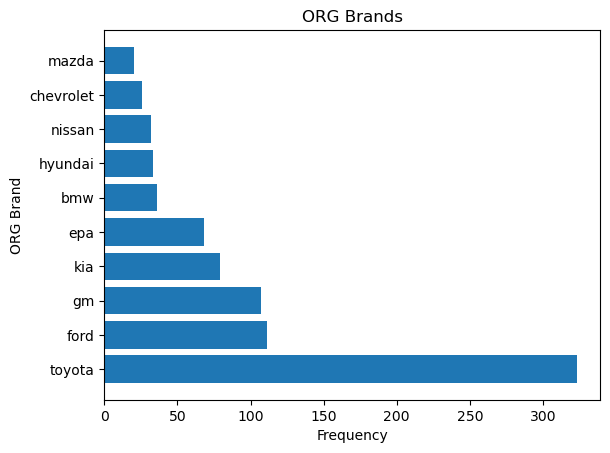

In [331]:
name_val = 'ORG'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

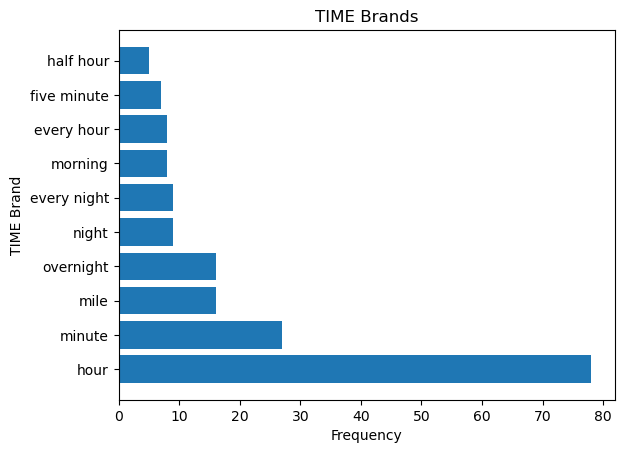

In [332]:
name_val = 'TIME'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

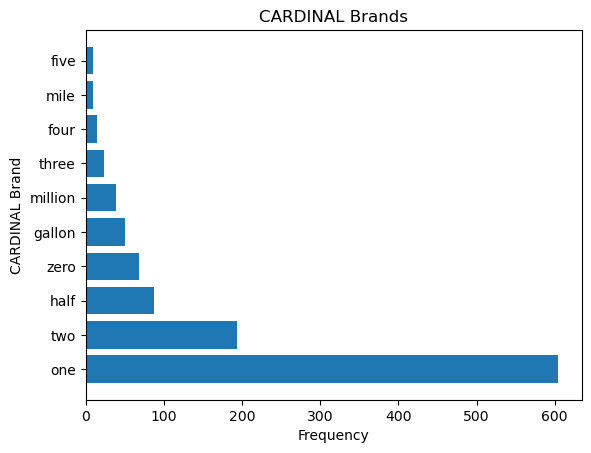

In [333]:
name_val = 'CARDINAL'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

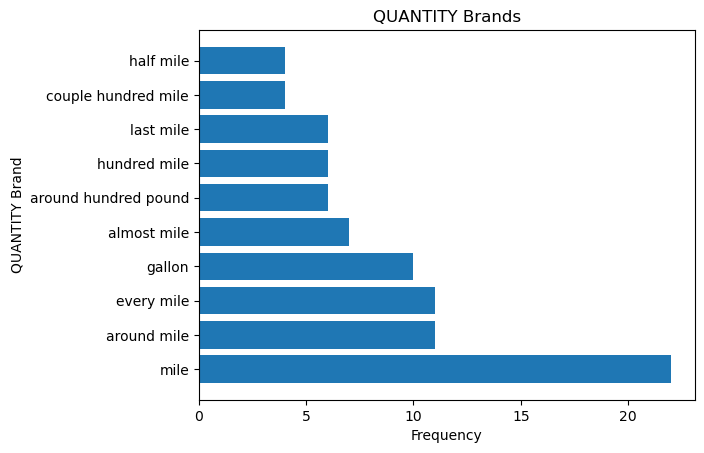

In [334]:
name_val = 'QUANTITY'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

In [335]:
word_counter = Counter()
for row in df_reply.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_reply"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_reply = pd.DataFrame(word_counter.most_common())
df_tf_reply.columns = ["term", "frequency"]
df_tf_reply

term  frequency
0              car       2300
1              get       1930
2          battery       1716
3             mile       1701
4           charge       1593
...            ...        ...
8632       leakage          1
8633   sublimation          1
8634  scientifical          1
8635         inter          1
8636          vals          1

[8637 rows x 2 columns]

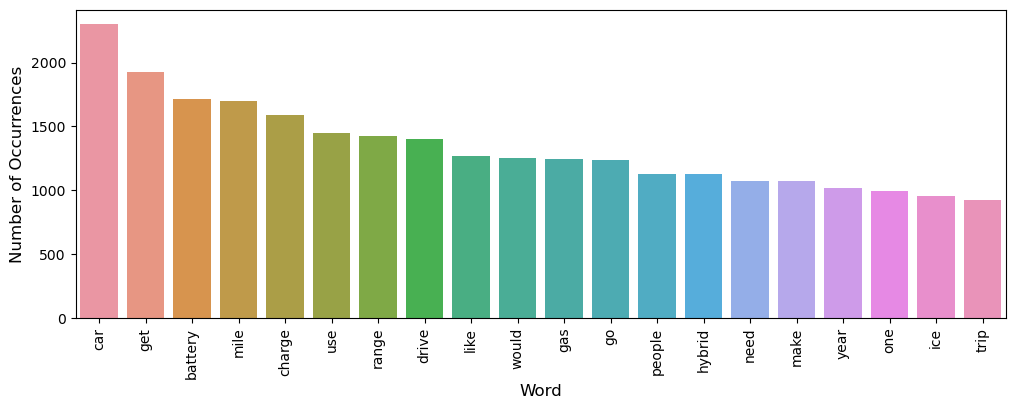

In [336]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_reply[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

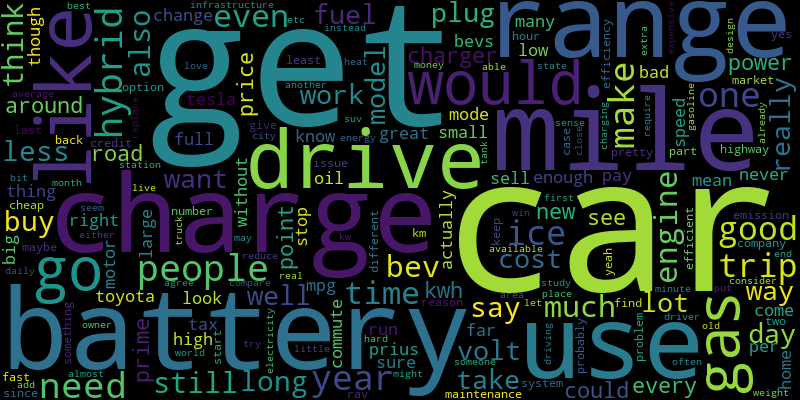

In [337]:
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image_reply = cloud.to_image()
image_reply

In [338]:
documents = [comment.split() for comment in df_reply['cleaned_reply']]
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.016*"use" + 0.012*"car" + 0.011*"battery" + 0.010*"gas" + 0.010*"hybrid" '
  '+ 0.010*"get" + 0.010*"go" + 0.009*"charge" + 0.009*"one" + 0.008*"year"'),
 (1,
  '0.017*"car" + 0.013*"charge" + 0.012*"get" + 0.011*"would" + 0.009*"even" + '
  '0.008*"make" + 0.007*"people" + 0.007*"bev" + 0.007*"hybrid" + 0.007*"go"'),
 (2,
  '0.014*"battery" + 0.012*"car" + 0.011*"like" + 0.011*"get" + 0.010*"range" '
  '+ 0.009*"year" + 0.008*"gas" + 0.008*"use" + 0.008*"people" + 0.008*"mile"'),
 (3,
  '0.019*"mile" + 0.012*"car" + 0.012*"battery" + 0.011*"would" + 0.010*"get" '
  '+ 0.010*"range" + 0.010*"hybrid" + 0.009*"need" + 0.008*"good" + '
  '0.008*"make"'),
 (4,
  '0.019*"get" + 0.013*"battery" + 0.012*"use" + 0.012*"car" + 0.009*"like" + '
  '0.008*"need" + 0.007*"engine" + 0.007*"even" + 0.007*"people" + '
  '0.007*"range"'),
 (5,
  '0.014*"car" + 0.013*"like" + 0.010*"ice" + 0.010*"hybrid" + 0.010*"go" + '
  '0.009*"good" + 0.008*"drive" + 0.008*"use" + 0.008*"get" + 0.006*"year

<Axes: ylabel='Frequency'>

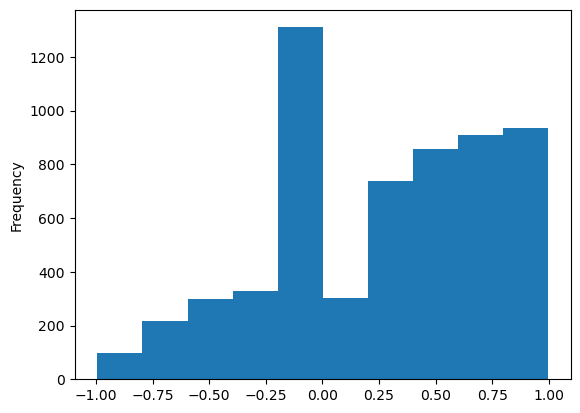

In [339]:
sia = SentimentIntensityAnalyzer()
def score_vader(row):
    text = row["cleaned_reply"]
    return sia.polarity_scores(text)["compound"]

df_reply["vader_sentiment"] = df_reply.apply(score_vader, axis=1)
df_reply["vader_sentiment"].plot(kind="hist")

In [340]:
print("Positive Reply Count - " + str(len(df_reply[df_reply['vader_sentiment'] > 0])))
print("Neutral Reply Count - " + str(len(df_reply[df_reply['vader_sentiment'] == 0])))
print("Negative Reply Count - " + str(len(df_reply[df_reply['vader_sentiment'] < 0])))

Positive Reply Count - 3743
Neutral Reply Count - 1035
Negative Reply Count - 1216


mile round trip 35
drive mile day 35
oil change year 22
long road trip 20
long range bevs 20
need oil change 16
internal combustion engine 16
people drive mile 15
road trip year 14
new prius prime 14
dc fast charge 14
round trip commute 13
buy new car 13
prius prime mile 13
low income people 13
perfect enemy good 12
dc fast charger 12
drive long distance 12
make lot sense 11
mile range mile 11


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

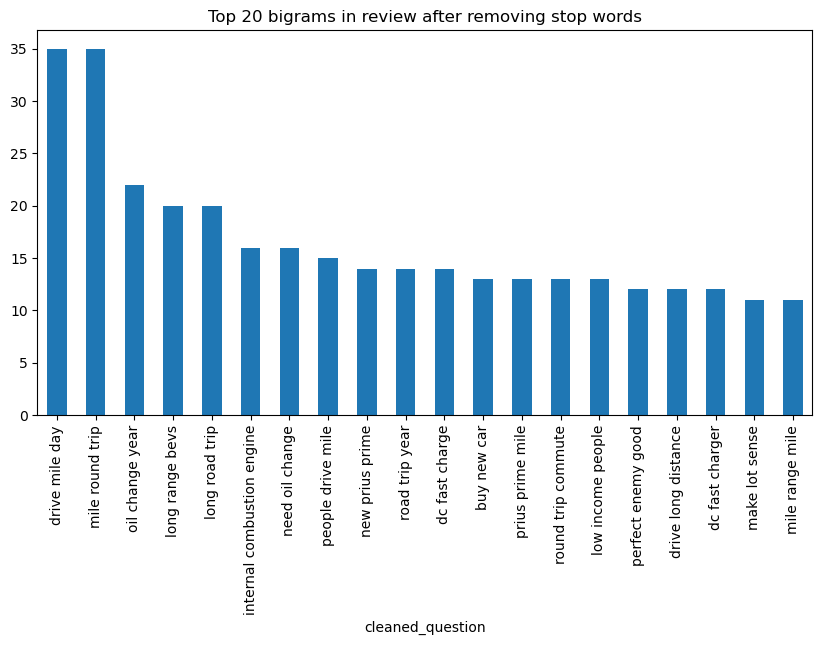

In [341]:

common_words = get_top_n_bigram(df_reply['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


let perfect enemy good 9
small sport utility wd 8
commute mile round trip 7
mile round trip commute 6
kw motor kw motor 6
mile range mile range 5
reduce fossil fuel use 5
fast charge road trip 5
real world drive share 5
tesla model long range 4
people drive mile day 4
believe gas car term 4
gas car term convenience 4
driver travel mile day 4
motor kw motor kw 4
mile round trip work 4
mile winter highway range 4
availability battery material limitless 4
real world fuel consumption 4
hybrid battery traction battery 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

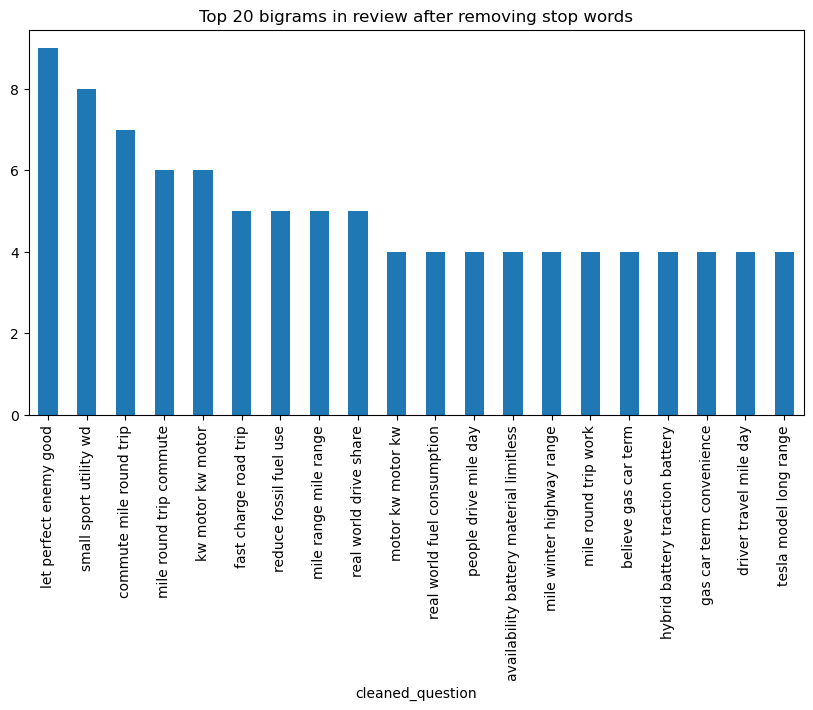

In [342]:

common_words = get_top_n_bigram(df_reply['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


believe gas car term convenience 4
kw motor kw motor kw 4
motor kw motor kw motor 4
car dont waste money mediocre 4
dont waste money mediocre make 4
waste money mediocre make stop 4
money mediocre make stop fool 4
mediocre make stop fool gon 4
make stop fool gon na 4
stop fool gon na money 4
drive efficiently speed especially downhill 4
efficiently speed especially downhill ish 4
speed especially downhill ish road 4
especially downhill ish road optimal 4
downhill ish road optimal fuel 4
ish road optimal fuel level 4
road optimal fuel level engine 4
optimal fuel level engine rpm 4
fuel level engine rpm rotationpersecond 4
level engine rpm rotationpersecond steering 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

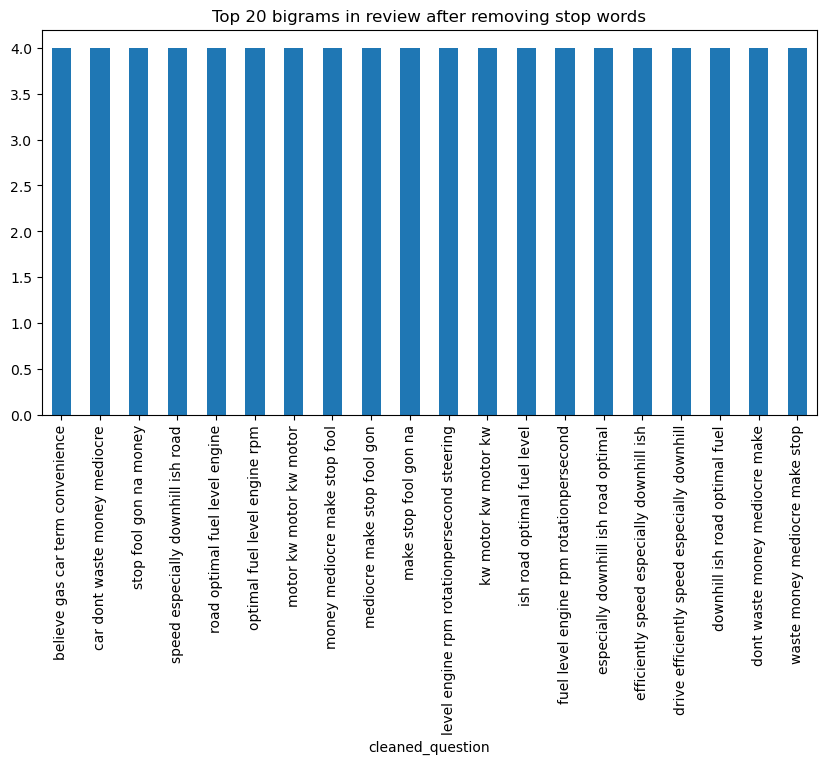

In [343]:

common_words = get_top_n_bigram(df_reply['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


need oil change 4
oil change year 4
second gen volt 4
people drive mile 3
km pure range 3
drive mile day 2
bev make sense 2
pedal driving mode 2
rare fairly common 2
fairly common situation 2
common situation seattle 2
situation seattle area 2
seattle area ski 2
area ski hike 2
ski hike month 2
hike month rural 2
month rural area 2
rural area lack 2
area lack reliable 2
lack reliable fast 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

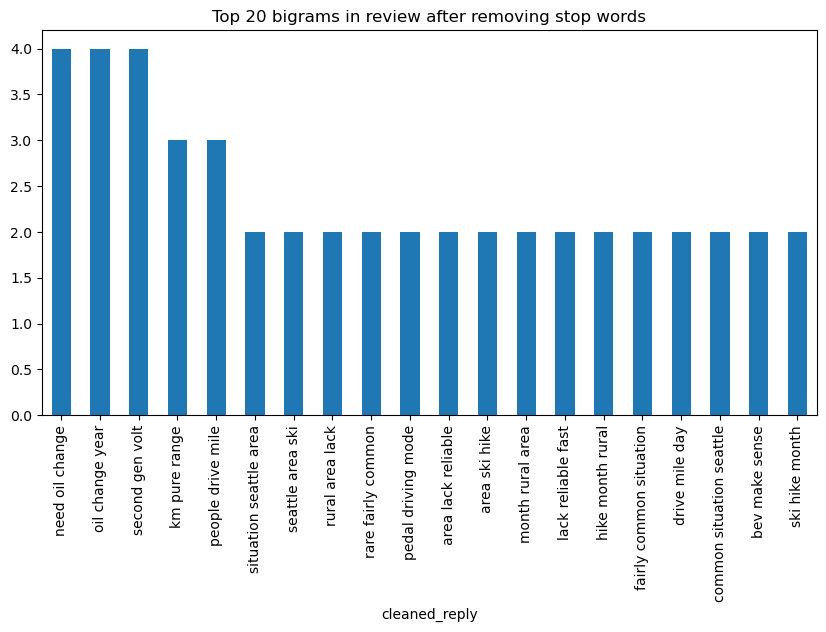

In [344]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


need oil change year 3
rare fairly common situation 2
fairly common situation seattle 2
common situation seattle area 2
situation seattle area ski 2
seattle area ski hike 2
area ski hike month 2
ski hike month rural 2
hike month rural area 2
month rural area lack 2
rural area lack reliable 2
area lack reliable fast 2
lack reliable fast charger 2
reliable fast charger drive 2
fast charger drive sure 2
bmw try scheme rex 2
try scheme rex discontinue 2
scheme rex discontinue high 2
rex discontinue high cost 2
discontinue high cost lackluster 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

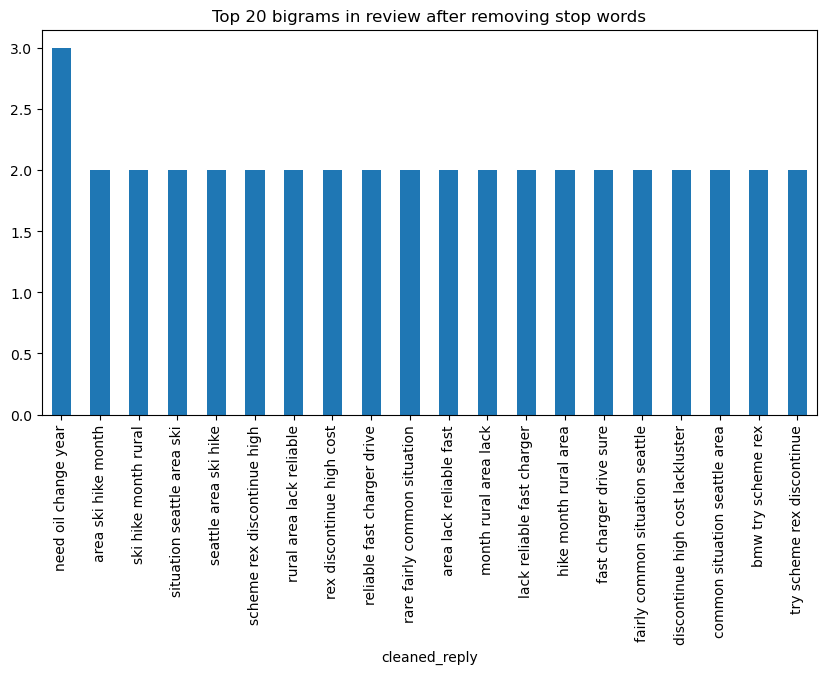

In [345]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


rare fairly common situation seattle 2
fairly common situation seattle area 2
common situation seattle area ski 2
situation seattle area ski hike 2
seattle area ski hike month 2
area ski hike month rural 2
ski hike month rural area 2
hike month rural area lack 2
month rural area lack reliable 2
rural area lack reliable fast 2
area lack reliable fast charger 2
lack reliable fast charger drive 2
reliable fast charger drive sure 2
bmw try scheme rex discontinue 2
try scheme rex discontinue high 2
scheme rex discontinue high cost 2
rex discontinue high cost lackluster 2
discontinue high cost lackluster sale 2
regenerative brake work way generate 2
brake work way generate electricity 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

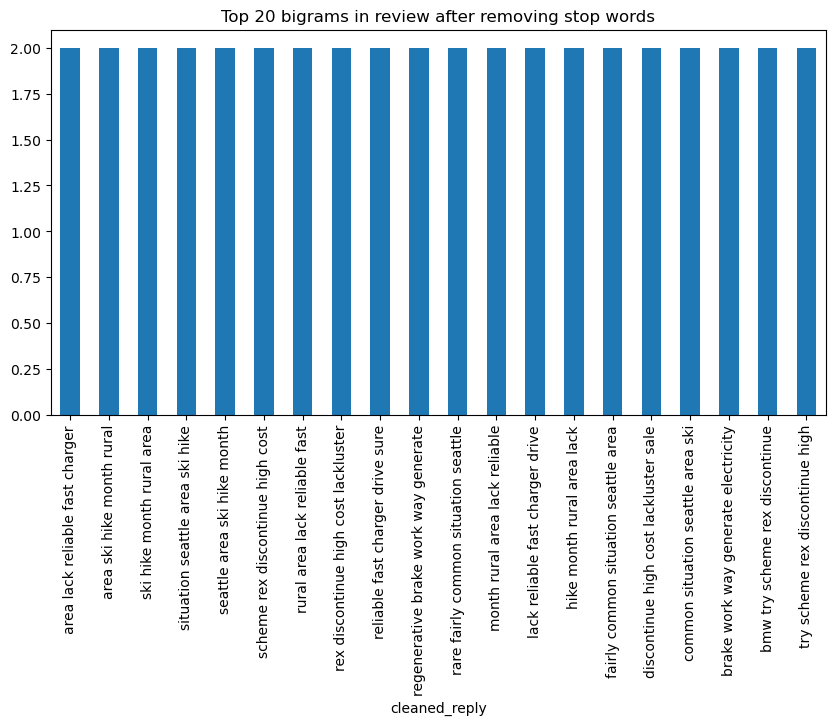

In [346]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


drive mile day 27
mile round trip 26
long range bevs 19
long road trip 18
oil change year 15
perfect enemy good 12
road trip year 12
prius prime mile 12
dc fast charge 12
round trip commute 11
new prius prime 11
internal combustion engine 11
people drive mile 11
mile range mile 10
drive long distance 10
low income people 10
let perfect enemy 9
road trip mile 9
need oil change 9
buy new car 9


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

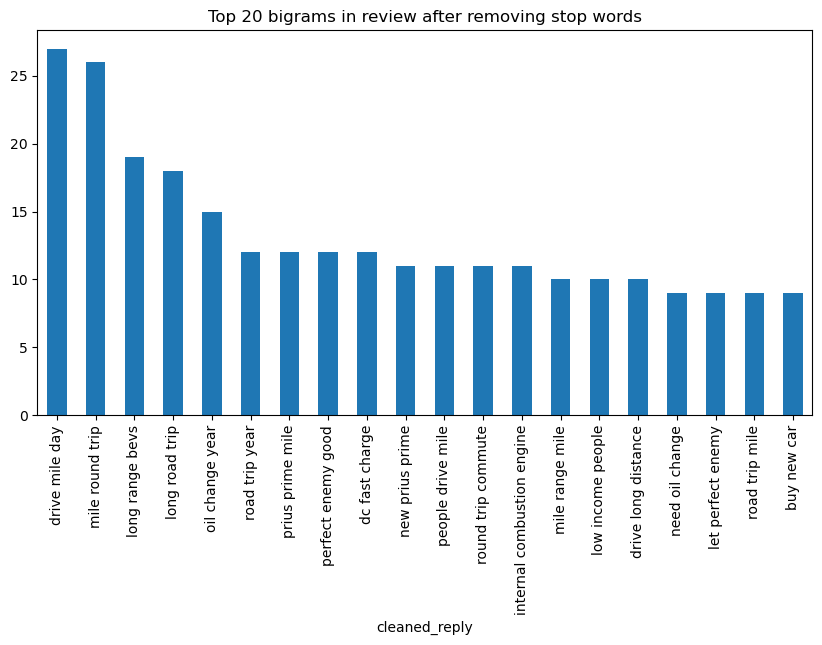

In [347]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


let perfect enemy good 9
small sport utility wd 8
kw motor kw motor 6
mile round trip commute 5
mile range mile range 5
reduce fossil fuel use 5
commute mile round trip 5
believe gas car term 4
gas car term convenience 4
motor kw motor kw 4
mile round trip work 4
real world drive share 4
lbs tow capacity kw 4
car dont waste money 4
dont waste money mediocre 4
waste money mediocre make 4
money mediocre make stop 4
mediocre make stop fool 4
make stop fool gon 4
stop fool gon na 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

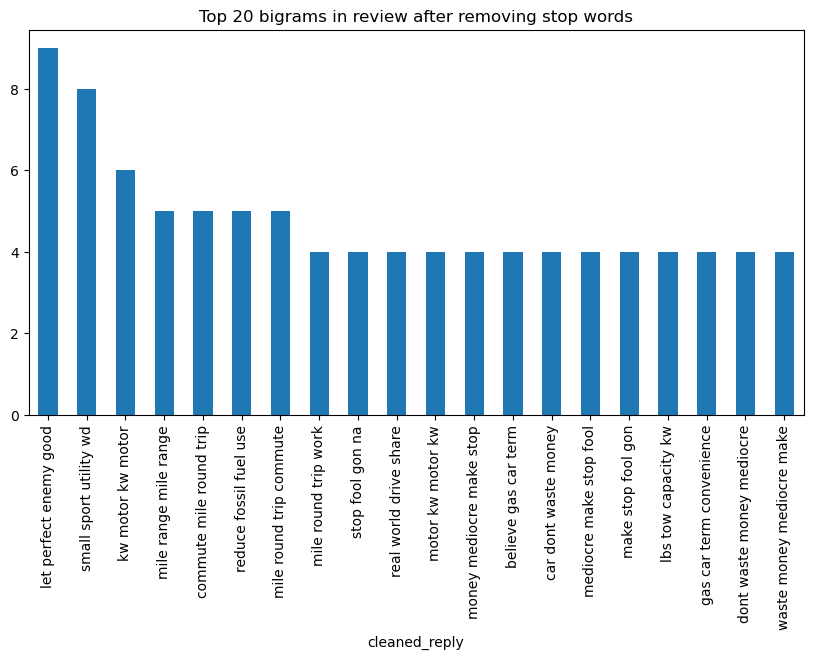

In [348]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


believe gas car term convenience 4
kw motor kw motor kw 4
motor kw motor kw motor 4
car dont waste money mediocre 4
dont waste money mediocre make 4
waste money mediocre make stop 4
money mediocre make stop fool 4
mediocre make stop fool gon 4
make stop fool gon na 4
stop fool gon na money 4
drive efficiently speed especially downhill 4
efficiently speed especially downhill ish 4
speed especially downhill ish road 4
especially downhill ish road optimal 4
downhill ish road optimal fuel 4
ish road optimal fuel level 4
road optimal fuel level engine 4
optimal fuel level engine rpm 4
fuel level engine rpm rotationpersecond 4
level engine rpm rotationpersecond steering 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

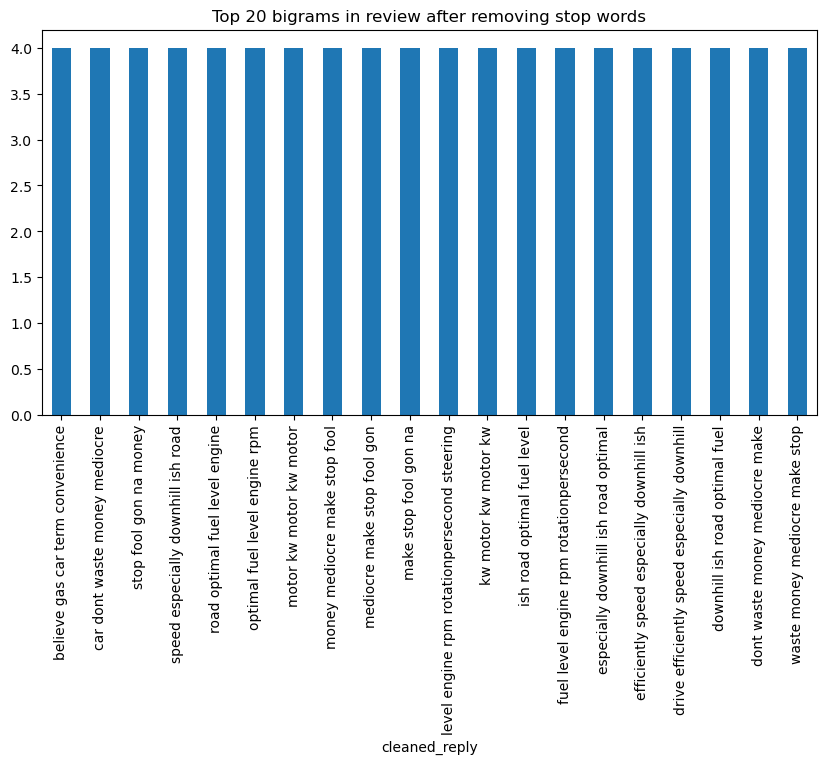

In [349]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


mile round trip 7
drive mile day 6
internal combustion engine 5
brand new car 4
gas engine use 4
hyundai ioniq kia 4
heat passenger compartment 4
hybrid battery traction 4
battery traction battery 4
model mid range 4
produce prius prime 4
pure ice car 4
annoy different charging 3
different charging apps 3
charging apps need 3
lithium ion battery 3
charge road trip 3
tiny kwh battery 3
engine drive wheel 3
need oil change 3


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

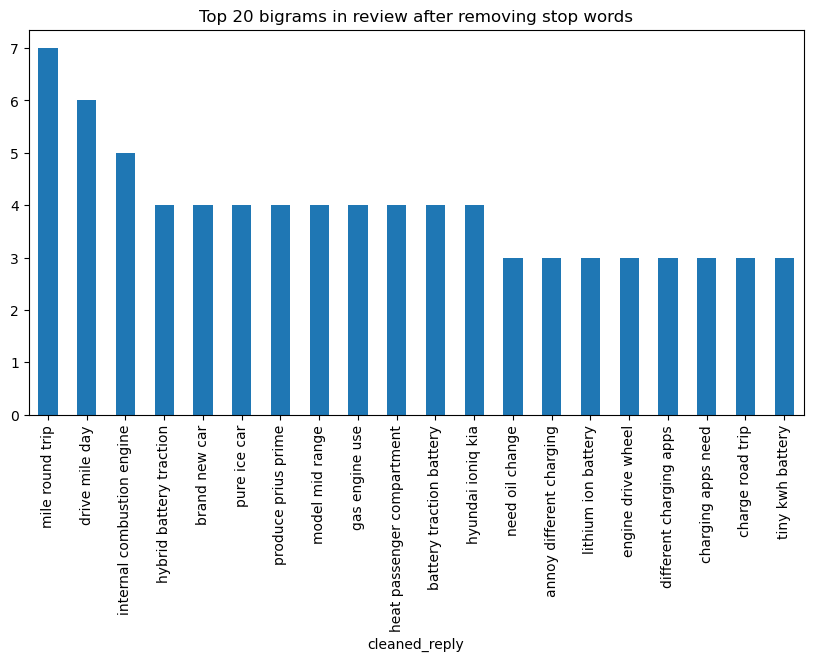

In [350]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


hybrid battery traction battery 4
annoy different charging apps 3
different charging apps need 3
long term product road 3
term product road map 3
model rely waste heat 3
rely waste heat internal 3
waste heat internal combustion 3
heat internal combustion engine 3
internal combustion engine heat 3
combustion engine heat passenger 3
engine heat passenger compartment 3
sufficient coverage want travel 2
coverage want travel coast 2
want travel coast coast 2
travel coast coast issue 2
engine transmission gas tank 2
tiny kwh battery pretty 2
kwh battery pretty crappy 2
battery pretty crappy max 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

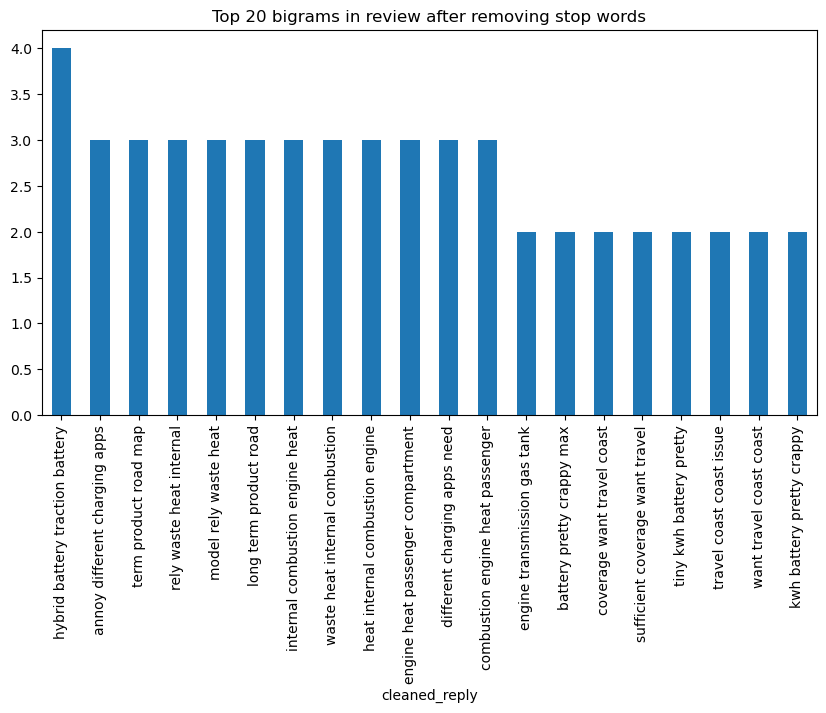

In [351]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


annoy different charging apps need 3
long term product road map 3
model rely waste heat internal 3
rely waste heat internal combustion 3
waste heat internal combustion engine 3
heat internal combustion engine heat 3
internal combustion engine heat passenger 3
combustion engine heat passenger compartment 3
sufficient coverage want travel coast 2
coverage want travel coast coast 2
want travel coast coast issue 2
tiny kwh battery pretty crappy 2
kwh battery pretty crappy max 2
battery pretty crappy max power 2
pretty crappy max power need 2
crappy max power need engine 2
max power need engine drive 2
power need engine drive wheel 2
need engine drive wheel power 2
engine drive wheel power highway 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

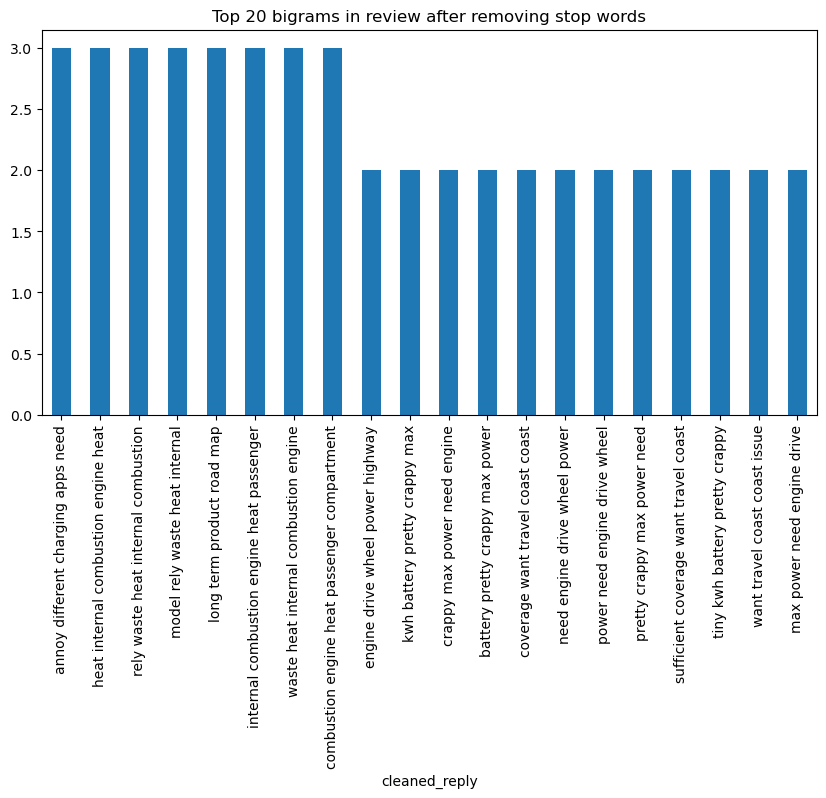

In [352]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


Topic 1:  car battery charge
Topic 2:  mile range trip
Topic 3:  battery kwh range
Topic 4:  charge battery kw
Topic 5:  prime hybrid rav
Topic 6:  engine drive gas
Topic 7:  car buy hybrid
Topic 8:  volt gen car
Topic 9:  good like look
Topic 10:  change oil year


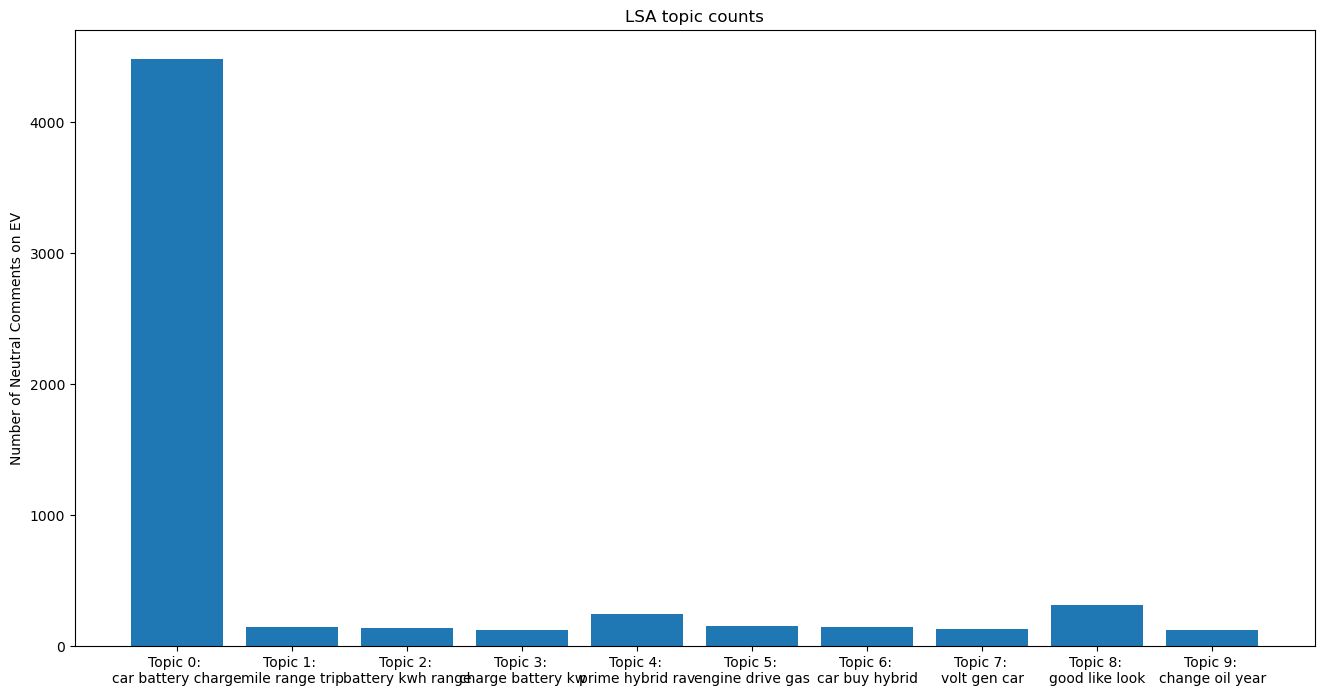

In [353]:
reindexed_data = df_reply['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car use battery
Topic 2:  mile commute highway
Topic 3:  buy rav car
Topic 4:  hybrid plug prius
Topic 5:  year model look
Topic 6:  charge fast home
Topic 7:  battery range engine
Topic 8:  think option bmw
Topic 9:  drive gas try
Topic 10:  say need people


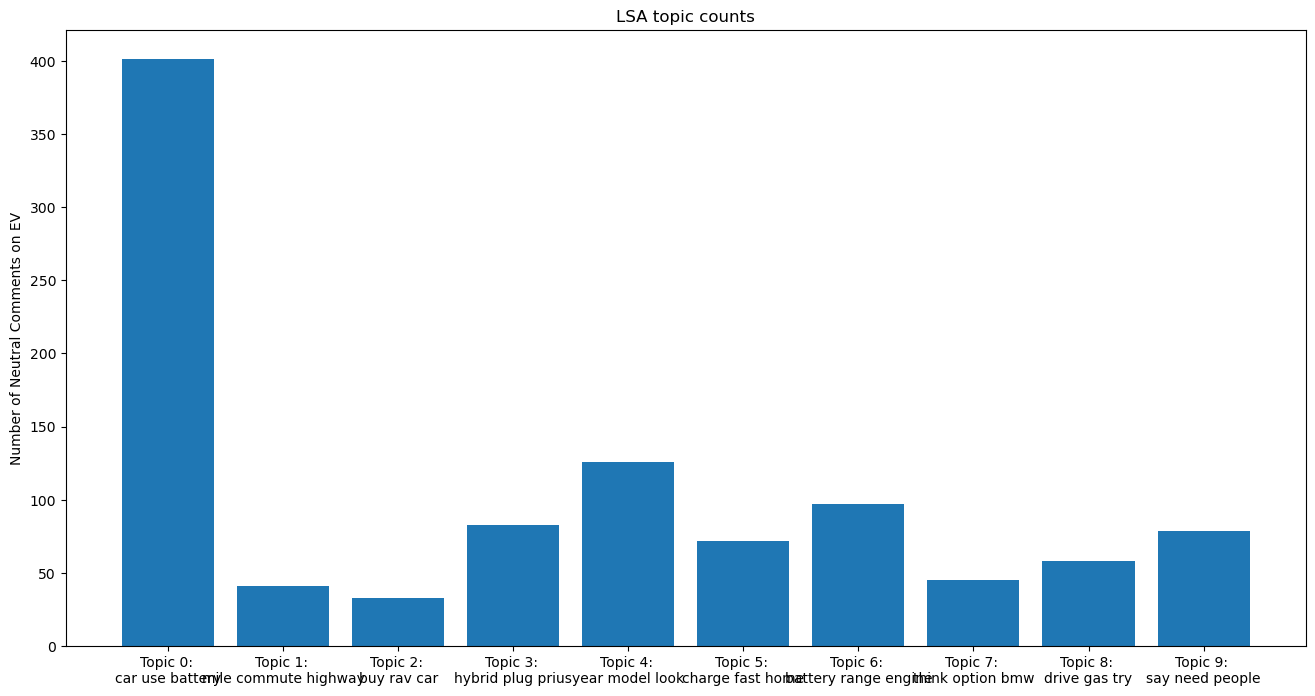

In [354]:
reindexed_data = df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car charge mile
Topic 2:  charge charger mile
Topic 3:  mile kwh range
Topic 4:  prime look lol
Topic 5:  good hybrid thanks
Topic 6:  tax credit price
Topic 7:  car volt great
Topic 8:  like yeah look
Topic 9:  road trip good
Topic 10:  people change hybrid


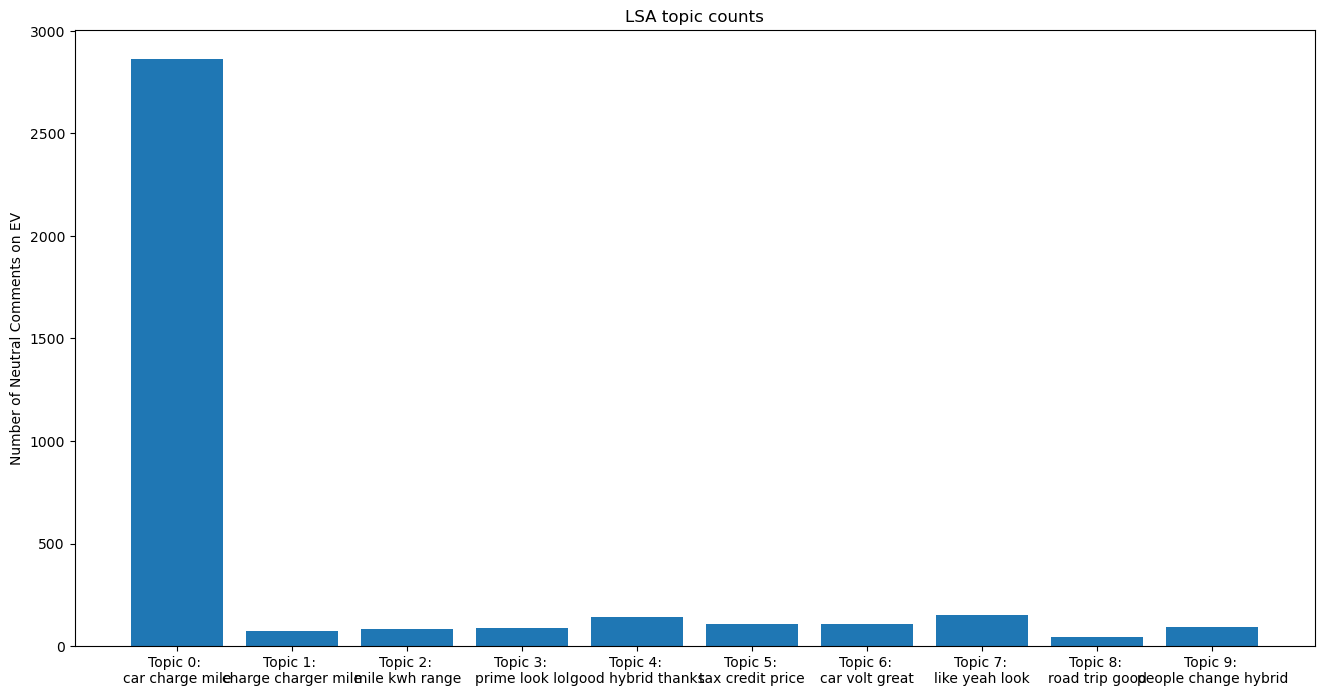

In [355]:
reindexed_data = df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car battery charge
Topic 2:  trip mile minute
Topic 3:  battery range kwh
Topic 4:  toyota sell hybrid
Topic 5:  mile gas range
Topic 6:  year change oil
Topic 7:  bad world brutal
Topic 8:  ice hybrid bad
Topic 9:  problem forget bad
Topic 10:  pay gas km


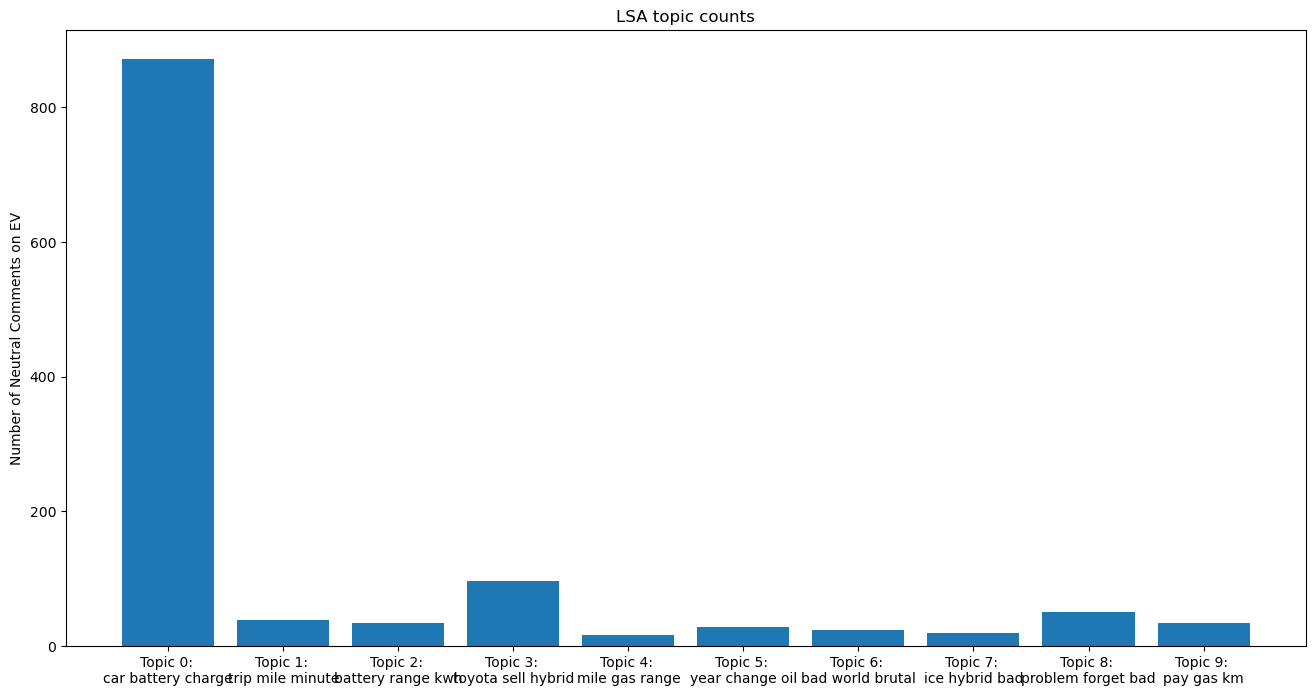

In [356]:
reindexed_data = df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car battery charge
Topic 2:  trip mile minute
Topic 3:  battery range kwh
Topic 4:  toyota prime model
Topic 5:  mile gas mean
Topic 6:  year car new
Topic 7:  people bad pay
Topic 8:  ice hybrid maintenance
Topic 9:  bad change oil
Topic 10:  low fuel cost


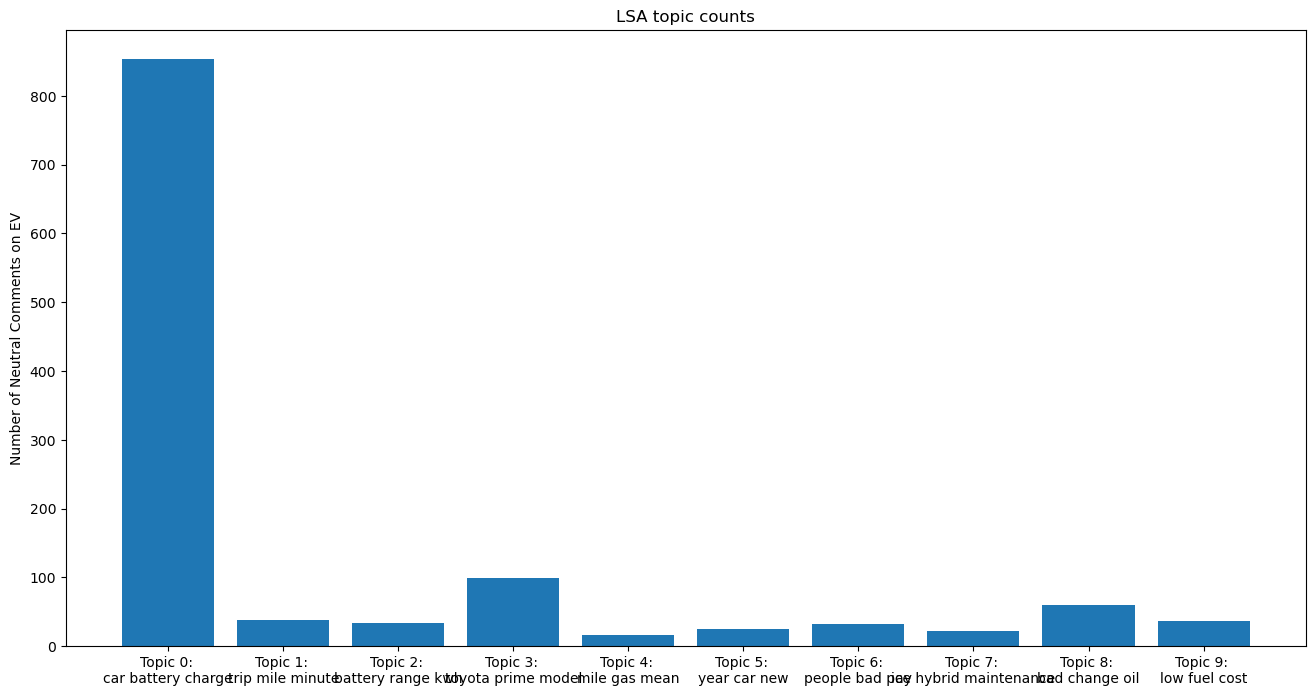

In [357]:
reindexed_data = df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

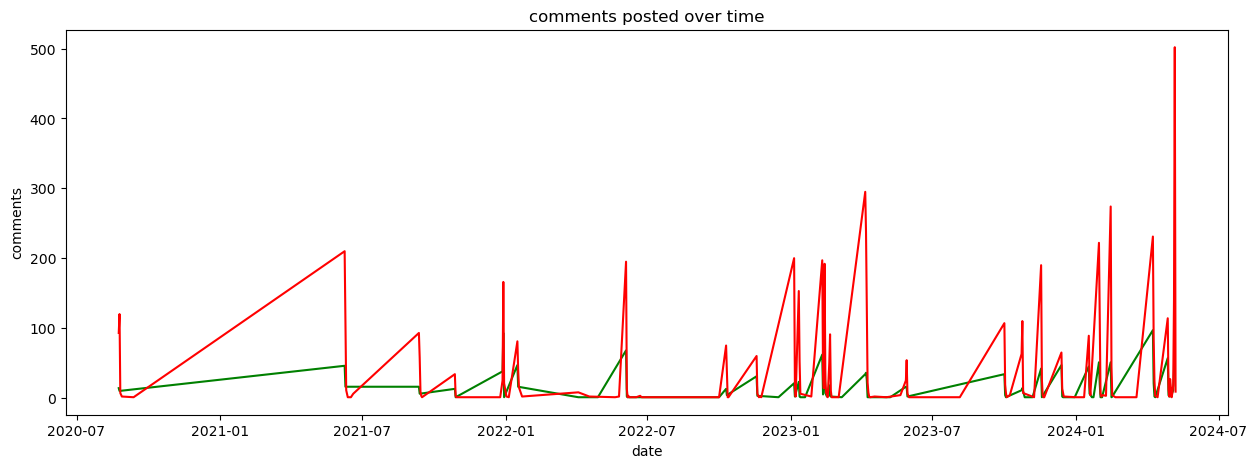

In [358]:
# df_title.groupby(df_title["comment_created_utc"].dt.date).size().plot(
#     title="comments posted over time",ylabel="comments", xlabel="date", color="b",figsize = (15,5))
df_question.groupby(df_question["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="g",figsize = (15,5))
df_reply.groupby(df_reply["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="r",figsize = (15,5))